<a href="https://colab.research.google.com/github/yumi-h-1/Predict-Business-Loan-Repayment-Default/blob/main/Initial_Analysis_of_the_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Analysis of Dataset

In [ ]:
# Import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount the google drive to import the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the original dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/U.S. Small Business Administration/SBAnational.csv', low_memory=False)
pd.options.display.max_columns # See all columns, https://towardsdatascience.com/6-pandas-display-options-you-should-memories-84adf8887bc3
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [ ]:
# Check the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [ ]:
# Check the total of null values in the dataframe
df.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
# The rows of the features below which have null values are removed.
# Since those features are consisted of objects in the dataframe, it is hard to fill with mean or mode of the values.
# In particular, 'MIS_Status' is considered a target for models, so null values in this feature are also removed.
# In case of 'RevLineCr', 'LowDoc', 'ChgOffDate' and 'DisbursementDate', the null values in those features will be remained.
df.dropna(subset=['Name', 'City', 'State', 'Bank', 'BankState', 'NewExist', 'MIS_Status'], inplace=True)

In [ ]:
df.isna().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4511
LowDoc                 2575
ChgOffDate           733124
DisbursementDate       2173
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
# Check the number of distinct values
df.nunique()

LoanNr_ChkDgt        895465
Name                 777342
City                  32537
State                    51
Zip                   33582
Bank                   5796
BankState                56
NAICS                  1312
ApprovalDate           9818
ApprovalFY               48
Term                    412
NoEmp                   598
NewExist                  3
CreateJob               246
RetainedJob             357
FranchiseCode          2765
UrbanRural                3
RevLineCr                18
LowDoc                    8
ChgOffDate             6441
DisbursementDate       8445
DisbursementGross    118028
BalanceGross             15
MIS_Status                2
ChgOffPrinGr          83057
GrAppv                22070
SBA_Appv              38209
dtype: int64

In [ ]:
# 'NewExist', 'RevLineCr', 'LowDoc' should have only two distinct values according to the description of variables.
print(df['NewExist'].unique())
print(df['RevLineCr'].unique())
print(df['LowDoc'].unique())

[2. 1. 0.]
['N' '0' 'Y' 'T' nan '`' ',' '1' 'C' '3' '2' 'R' '7' 'A' '5' '.' '4' '-'
 'Q']
['Y' 'N' 'C' '1' nan 'S' 'R' 'A' '0']


In [ ]:
# Remove the value of 0 in 'NewExist'
df = df.drop(df[df['NewExist'] == 0.].index, axis=0)

# Change from float to integer
df['NewExist'] = pd.to_numeric(df['NewExist'], downcast='integer')

In [ ]:
# Remain the value of N or Y in 'RevLineCr' and 'LowDoc'
df = df[(df.RevLineCr == 'N') | (df.RevLineCr == 'Y')]
df = df[(df.LowDoc == 'N') | (df.LowDoc == 'Y')]

In [ ]:
# Check the value in 'UrbanRural' to make sure if this has only three types of the value.
print(df['UrbanRural'].unique())

[0 1 2]


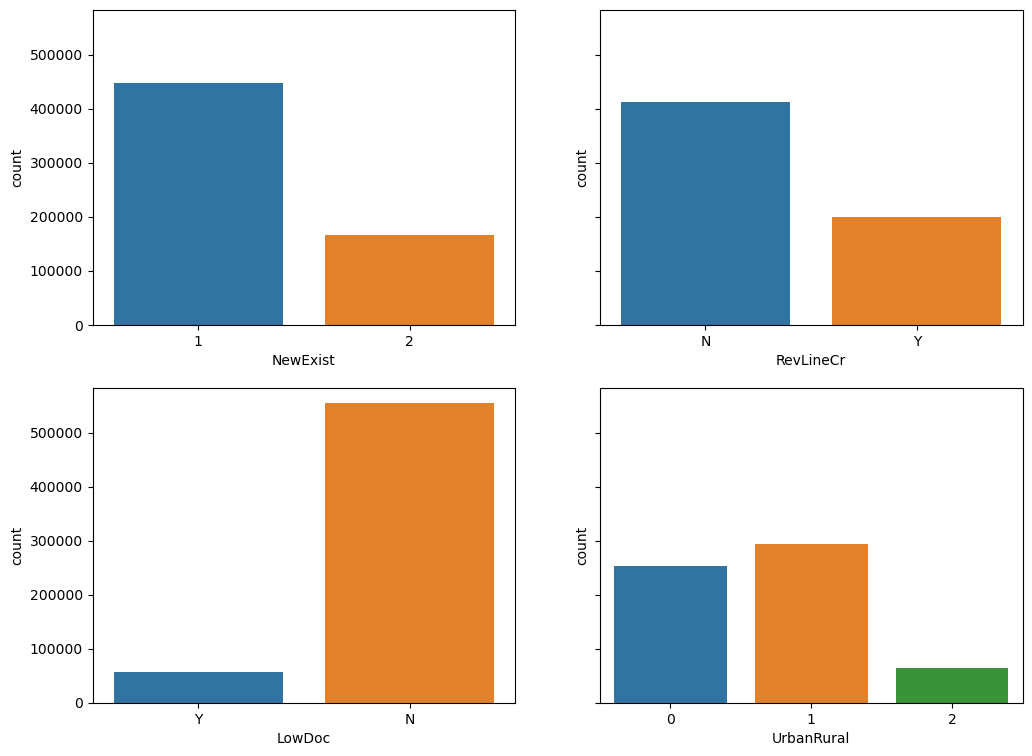

In [ ]:
# Show countplots of 'NewExist', 'RevLineCr', 'LowDoc' and 'UrbanRural'
fig, ax = plt.subplots(2, 2, figsize=(12, 9), sharey = True)
sns.countplot(data=df, x='NewExist', ax=ax[0, 0]);
sns.countplot(data=df, x='RevLineCr', ax=ax[0, 1]);
sns.countplot(data=df, x='LowDoc', ax=ax[1, 0]);
sns.countplot(data=df, x='UrbanRural', ax=ax[1, 1]);

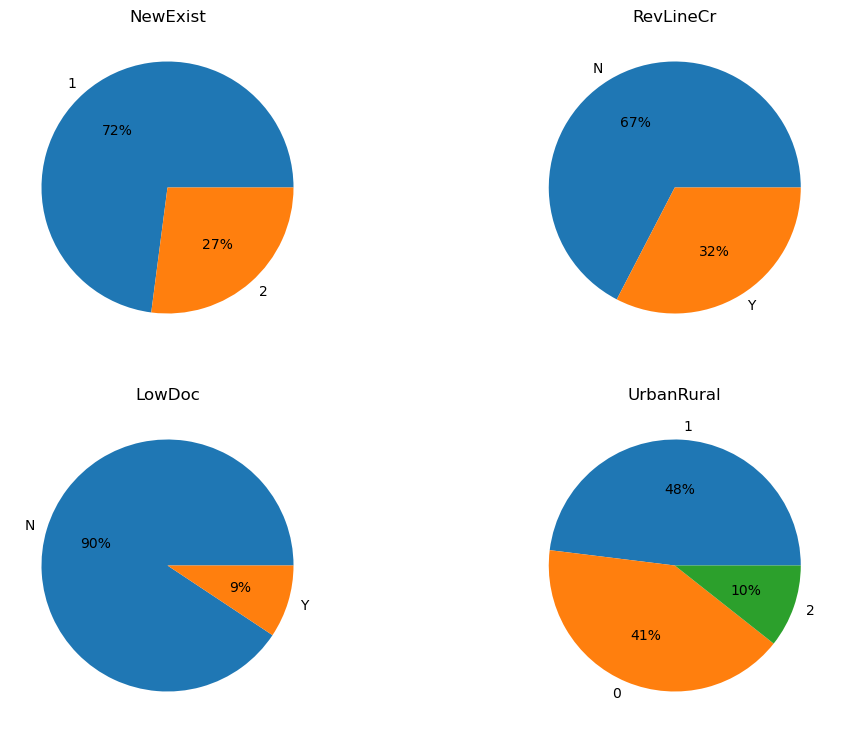

In [ ]:
# Show pie charts of 'NewExist', 'RevLineCr', 'LowDoc' and 'UrbanRural'
fig, ax = plt.subplots(2, 2, figsize=(12, 9))
ax[0, 0].pie(df['NewExist'].value_counts(),
             labels=df['NewExist'].value_counts().index,
             autopct='%d%%');
ax[0, 0].set_title('NewExist');
ax[0, 1].pie(df['RevLineCr'].value_counts(),
             labels=df['RevLineCr'].value_counts().index,
             autopct='%d%%');
ax[0, 1].set_title('RevLineCr');
ax[1, 0].pie(df['LowDoc'].value_counts(),
             labels=df['LowDoc'].value_counts().index,
             autopct='%d%%');
ax[1, 0].set_title('LowDoc');
ax[1, 1].pie(df['UrbanRural'].value_counts(),
             labels=df['UrbanRural'].value_counts().index,
             autopct='%d%%');
ax[1, 1].set_title('UrbanRural');

In [ ]:
# Change from object(string) to integer regarding 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv' and 'SBA_Appv'
def to_int(currency): #https://stackoverflow.com/questions/54318706/convert-list-of-element-to-int-and-not-the-string-in-python
    currency = currency.replace('$', '').replace('.00', '').replace(',', '')
    return int(currency)

In [ ]:
df['DisbursementGross'] = df['DisbursementGross'].apply(to_int)
df['BalanceGross'] = df['BalanceGross'].apply(to_int)
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].apply(to_int)
df['GrAppv'] = df['GrAppv'].apply(to_int)
df['SBA_Appv'] = df['SBA_Appv'].apply(to_int)

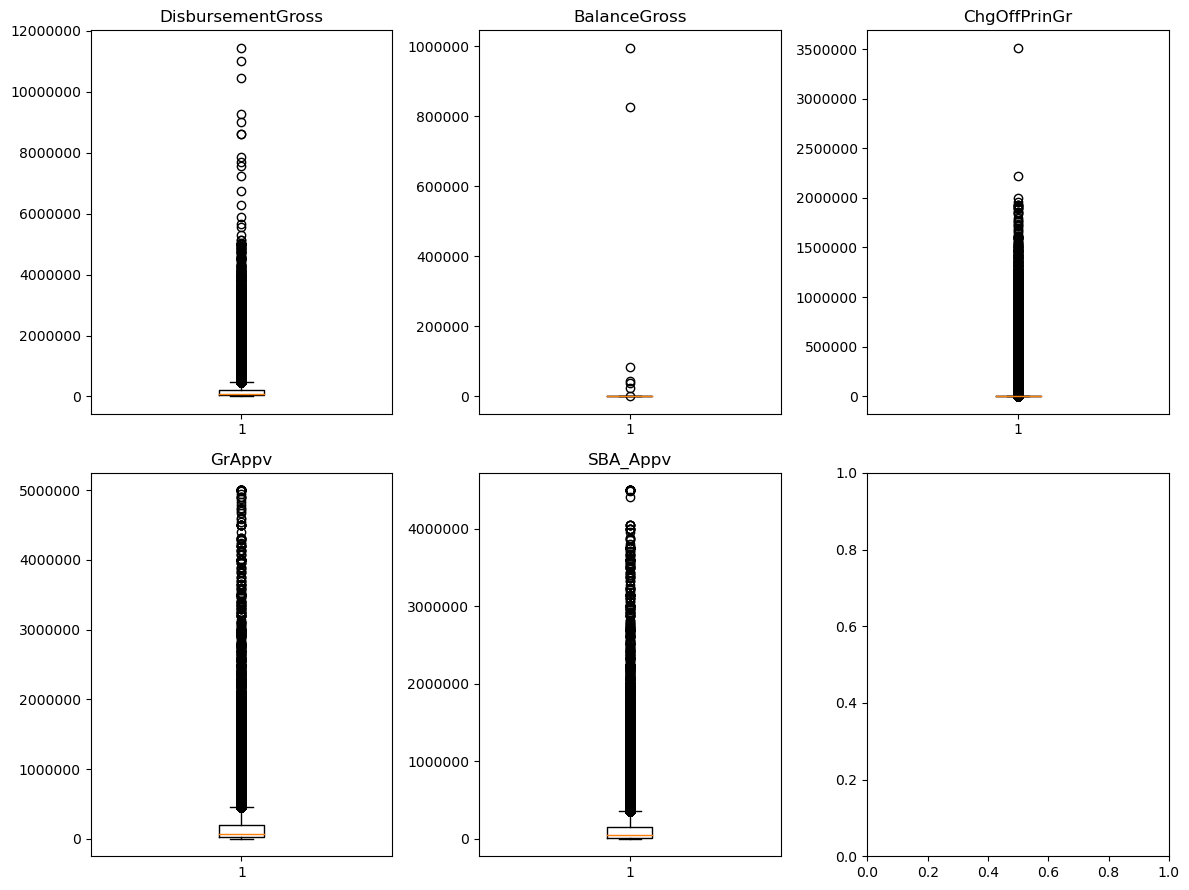

In [ ]:
# Show boxplots of 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv' and 'SBA_Appv'
fig, ax = plt.subplots(2, 3, figsize=(12, 9)) #sharey=True
ax[0, 0].boxplot(x=df["DisbursementGross"]);
ax[0, 0].ticklabel_format(style='plain', axis='y') # Change scientific notation to numbers in the data, https://www.tutorialspoint.com/prevent-scientific-notation-in-matplotlib-pyplot
ax[0, 0].set_title('DisbursementGross');
ax[0, 1].boxplot(x=df["BalanceGross"]);
ax[0, 1].ticklabel_format(style='plain', axis='y')
ax[0, 1].set_title('BalanceGross');
ax[0, 2].boxplot(x=df["ChgOffPrinGr"]);
ax[0, 2].ticklabel_format(style='plain', axis='y')
ax[0, 2].set_title('ChgOffPrinGr');
ax[1, 0].boxplot(x=df["GrAppv"]);
ax[1, 0].ticklabel_format(style='plain', axis='y')
ax[1, 0].set_title('GrAppv');
ax[1, 1].boxplot(x=df["SBA_Appv"]);
ax[1, 1].ticklabel_format(style='plain', axis='y')
ax[1, 1].set_title('SBA_Appv');
plt.tight_layout()

Text(0, 0.5, 'GrAppv')

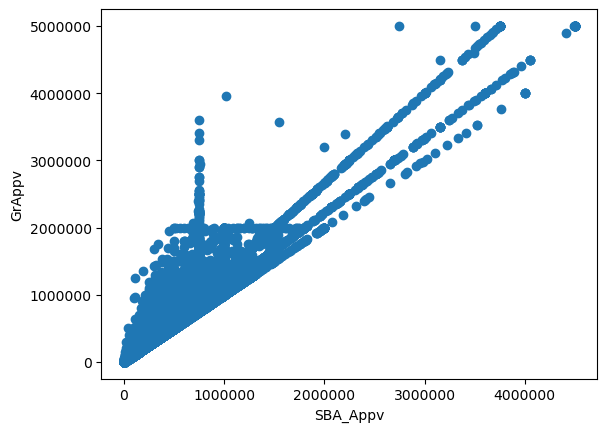

In [ ]:
# Check the relationship between 'SBA_Appv' and 'GrAppv'
plt.scatter(df['SBA_Appv'], df['GrAppv']);
plt.ticklabel_format(style='plain')
plt.xlabel('SBA_Appv')
plt.ylabel('GrAppv')

It seems 'SBA_Appv' and 'GrAppv' have a strong relationship between them.

In [ ]:
# Industry classification by the first two digits of NAICS
df['NAICS'] = df['NAICS'].astype(str).str[:2].astype(int)
df['NAICS'].unique()

array([45, 72, 62,  0, 33, 81, 23, 44, 42, 61, 53, 54, 51, 31, 52, 32, 56,
       71, 48, 11, 92, 22, 49, 55, 21])

In [ ]:
# Remove 0 of NAICS as it does not indicate any industry (https://www.census.gov/naics/?58967?yearbck=2012)
df = df.drop(df[df['NAICS'] == 0.].index, axis=0)

In [ ]:
# Simplify certain codes to match the industry: Manufacturing, Retail trade, and Transportation and warehousing
df['NAICS'] = df['NAICS'].apply(lambda v: 31 if v in [31, 32, 33] else v)
df['NAICS'] = df['NAICS'].apply(lambda v: 44 if v in [44, 45] else v)
df['NAICS'] = df['NAICS'].apply(lambda v: 48 if v in [48, 49] else v)
df['NAICS'].unique()

array([44, 72, 62, 31, 81, 23, 42, 61, 53, 54, 51, 52, 56, 71, 48, 11, 92,
       22, 55, 21], dtype=int64)

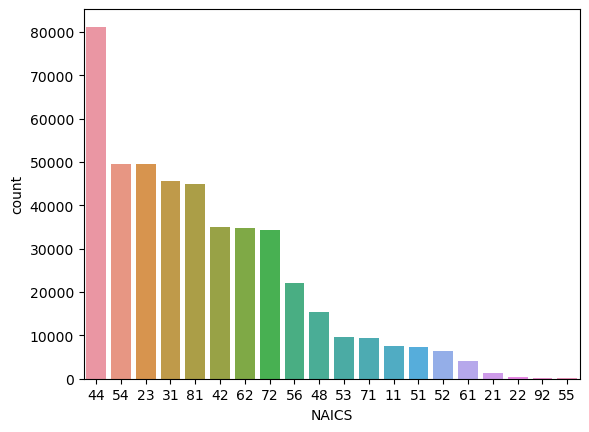

In [ ]:
# Show countplot of 'NAICS'
sns.countplot(df, x='NAICS', order = df['NAICS'].value_counts().index);

The industry of retail trade receives the most loans.

The second is professional, scientific, and technical services.

The third is construction, the forth is manufacturing and the fifth is other services sector (except public administration).

In [ ]:
# Simplify 'FranchiseCode' by creating a new column to differentiate between franchises and non-franchises
# Code 0 or 1 means 'that those companies have no franchise, so these numbers will be replaced to 0 in the new column 'Franchise'
# The other codes will be 1 in 'Franchise,' indicating 'has a franchise'
print(df['FranchiseCode'].nunique())
print(df['FranchiseCode'].unique())
df['Franchise'] = df['FranchiseCode'].apply(lambda v: 0 if v in [0, 1] else 1)
print(df['Franchise'].unique())

1692
[    1 15100 10656 ... 16452 75985 42533]
[0 1]


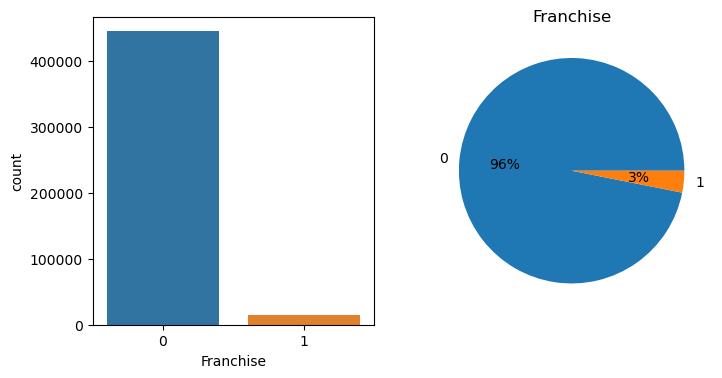

In [ ]:
# Show countplot and pie chart of 'Franchise'
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=df, x='Franchise', ax=ax[0]);
ax[1].pie(df['Franchise'].value_counts(),
             labels=df['Franchise'].value_counts().index,
             autopct='%d%%');
ax[1].set_title('Franchise');

In [ ]:
#'MIS_Status' is considered a target as mentioned above.
# To build a classification model, a new column is created, 'Default,' to distinguish whether the company ends up in default or not.
# 'P I F' means paid-in-full and 'CHGOFF' means default.
print(df['MIS_Status'].unique())
df['Default'] = df['MIS_Status']
df['Default'] = df['Default'].apply(lambda v: 0 if v == 'P I F' else 1)
print(df['Default'].unique())

['P I F' 'CHGOFF']
[0 1]


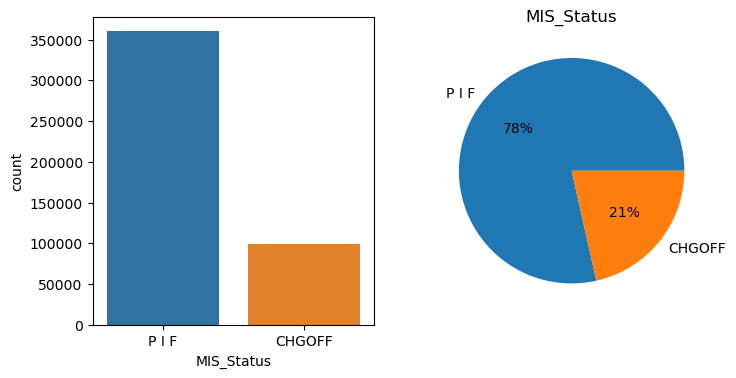

In [ ]:
# Show countplot and pie chart of 'MIS_Status'
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=df, x='MIS_Status', ax=ax[0]);
ax[1].pie(df['MIS_Status'].value_counts(),
             labels=df['MIS_Status'].value_counts().index,
             autopct='%d%%');
ax[1].set_title('MIS_Status');

In [ ]:
# Change the data type of 'ApprovalDate', 'ChgOffDate' and 'DisbursementDate' to date and time
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'])
df['ChgOffDate'] = pd.to_datetime(df['ChgOffDate'])
df['DisbursementDate'] = pd.to_datetime(df['DisbursementDate'])

In [ ]:
# Select only year from 'ApprovalDate', 'ChgOffDate' and 'DisbursementDate'
df['ApprovalDate'] = pd.DatetimeIndex(df['ApprovalDate']).year
df['ChgOffDate'] = pd.DatetimeIndex(df['ChgOffDate']).year
df['DisbursementDate'] = pd.DatetimeIndex(df['DisbursementDate']).year
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate           int64
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist                int8
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate           float64
DisbursementDate     float64
DisbursementGross      int64
BalanceGross           int64
MIS_Status            object
ChgOffPrinGr           int64
GrAppv                 int64
SBA_Appv               int64
Franchise              int64
Default                int64
dtype: object

In [ ]:
# Change the data type of 'ApprovalFY' to interger
df['ApprovalFY'] = df['ApprovalFY'].astype(int)

In [ ]:
# Check the general statistics of each numerical feature
df.describe().round()

,LoanNr_ChkDgt,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,...,UrbanRural,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,Franchise,Default
count,4.586710e+05,458671.0,458671.0,458671.0,458671.0,458671.0,458671.0,458671.0,458671.0,458671.0,...,458671.0,101325.0,456940.0,458671.0,458671.0,458671.0,458671.0,458671.0,458671.0,458671.0
mean,4.287626e+09,52090.0,50.0,2003.0,2003.0,94.0,10.0,1.0,2.0,5.0,...,1.0,2009.0,2003.0,171884.0,4.0,12897.0,153956.0,116976.0,0.0,0.0
std,2.414560e+09,31346.0,18.0,6.0,6.0,68.0,57.0,0.0,16.0,16.0,...,1.0,3.0,6.0,274970.0,1919.0,57984.0,261167.0,214072.0,0.0,0.0
min,1.000014e+09,0.0,11.0,1984.0,1984.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1988.0,1984.0,4000.0,0.0,0.0,1000.0,500.0,0.0,0.0
25%,2.259111e+09,22110.0,42.0,2000.0,2000.0,59.0,2.0,1.0,0.0,0.0,...,1.0,2009.0,2000.0,34918.0,0.0,0.0,25000.0,12700.0,0.0,0.0
50%,3.697126e+09,53223.0,48.0,2005.0,2005.0,84.0,4.0,1.0,0.0,1.0,...,1.0,2010.0,2005.0,75338.0,0.0,0.0,50000.0,35000.0,0.0,0.0
75%,6.088659e+09,82414.0,62.0,2007.0,2007.0,90.0,9.0,2.0,1.0,5.0,...,1.0,2011.0,2007.0,191500.0,0.0,0.0,156000.0,125000.0,0.0,0.0
max,9.995613e+09,99999.0,92.0,2014.0,2014.0,527.0,9999.0,2.0,5621.0,4441.0,...,2.0,2014.0,2028.0,11446325.0,996262.0,3512596.0,5000000.0,4500000.0,1.0,1.0


In [ ]:
df.describe(include=[object])

,Name,City,State,Bank,BankState,RevLineCr,LowDoc,MIS_Status
count,458671,458671,458671,458671,458671,458671,458671,458671
unique,418845,25188,51,4834,54,2,2,2
top,SUBWAY,LOS ANGELES,CA,BANK OF AMERICA NATL ASSOC,NC,N,N,P I F
freq,195,5853,61608,60416,56684,265194,433566,360146


In [ ]:
# Make sure all the values in the columns below uppercase
df['Name'] = df['Name'].str.upper()
df['City'] = df['City'].str.upper()
df['State'] = df['State'].str.upper()
df['Bank'] = df['Bank'].str.upper()
df['BankState'] = df['BankState'].str.upper()
df['RevLineCr'] = df['RevLineCr'].str.upper()
df['LowDoc'] = df['LowDoc'].str.upper()
df['MIS_Status'] = df['MIS_Status'].str.upper()

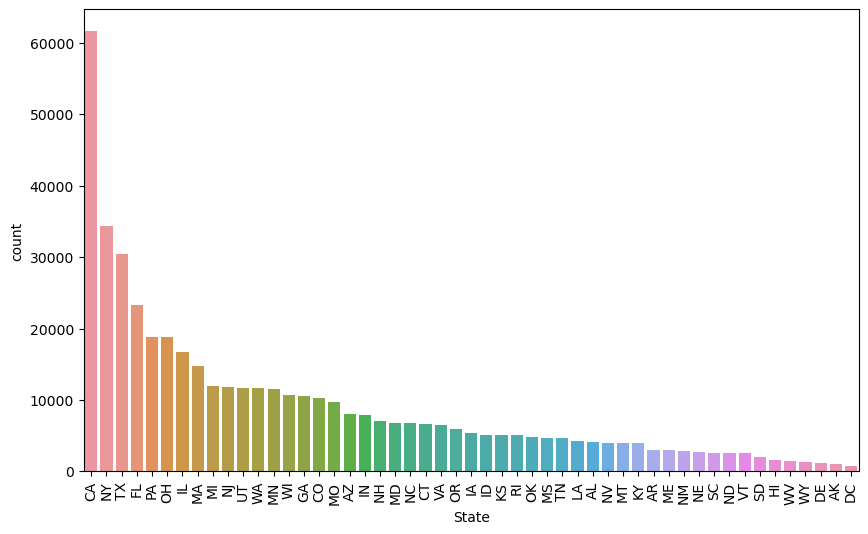

In [ ]:
# Check which state is dominated about small business loan from 1987 to 2014
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(df, x='State', order = df['State'].value_counts().index);
plt.xticks(rotation=90);

California has the most companies which got loans from banks.

### For a case study, we reduce this dataset by using data from California of the column 'State' since it has the largest proportion in the dataset.

In [ ]:
# Limit the dataset to California
df_CA = df.loc[df['State'] == 'CA']
df_CA

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Franchise,Default
28,1000506000,WEYLAND CORPORATION,CAMARILLO,CA,93010,WELLS FARGO BANK NATL ASSOC,SD,61,2006,2006,...,NaN,2006.0,438541,0,P I F,0,100000,50000,0,0
77,1000816010,TULON PACIFIC LLC,IRVINE,CA,92618,WELLS FARGO BANK NATL ASSOC,SD,42,2006,2006,...,NaN,2006.0,577000,0,P I F,0,300000,150000,0,0
130,1001146001,FOOD SOLUTIONS,PASADENA,CA,91011,MUFG UNION BANK NATL ASSOC,CA,72,2006,2006,...,NaN,2006.0,122977,0,P I F,0,50000,25000,0,0
193,1001546003,MEDIA ONE DIGITAL IMAGING LLC,GARDEN GROVE,CA,92841,WELLS FARGO BANK NATL ASSOC,CA,54,2006,2006,...,NaN,2006.0,85163,0,P I F,0,50000,25000,0,0
224,1001786005,505 MENDOCINO AVENUE,SANTA ROSA,CA,95401,SAFE-BIDCO,CA,72,2006,2006,...,2010.0,2006.0,250000,0,CHGOFF,234033,250000,187500,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899037,9993293010,"INTEGRATED COMPOSITES, INC",MARINA,CA,93933,"RABOBANK, NATIONAL ASSOCIATION",CA,31,1997,1997,...,NaN,1997.0,300000,0,P I F,0,300000,225000,0,0
899140,9995163010,TWIN CITIES SCHWINN,YUBA CITY,CA,95991,UMPQUA BANK,CA,44,1997,1997,...,NaN,1997.0,85000,0,P I F,0,85000,68000,0,0
899146,9995263005,HILL AND SONS INC.,OAKLAND,CA,94603,MORTGAGE CAP. DEVEL CORP,CA,31,1997,1997,...,NaN,1997.0,189000,0,P I F,0,189000,189000,0,0
899157,9995493004,PULLTARPS MFG.,EL CAJON,CA,92020,U.S. BANK NATIONAL ASSOCIATION,CA,31,1997,1997,...,NaN,1997.0,200000,0,P I F,0,200000,150000,0,0


In [ ]:
# Check the value in 'BalanceGross'
print(df_CA['BalanceGross'].nunique())
print(df_CA['BalanceGross'].unique())

1
[0]


In [ ]:
# As 'BalanceGross' has only one value which is 0, remove this column from df_CA
df_CA = df_CA.drop(['BalanceGross'], axis=1)
df_CA

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Franchise,Default
28,1000506000,WEYLAND CORPORATION,CAMARILLO,CA,93010,WELLS FARGO BANK NATL ASSOC,SD,61,2006,2006,...,N,NaN,2006.0,438541,P I F,0,100000,50000,0,0
77,1000816010,TULON PACIFIC LLC,IRVINE,CA,92618,WELLS FARGO BANK NATL ASSOC,SD,42,2006,2006,...,N,NaN,2006.0,577000,P I F,0,300000,150000,0,0
130,1001146001,FOOD SOLUTIONS,PASADENA,CA,91011,MUFG UNION BANK NATL ASSOC,CA,72,2006,2006,...,N,NaN,2006.0,122977,P I F,0,50000,25000,0,0
193,1001546003,MEDIA ONE DIGITAL IMAGING LLC,GARDEN GROVE,CA,92841,WELLS FARGO BANK NATL ASSOC,CA,54,2006,2006,...,N,NaN,2006.0,85163,P I F,0,50000,25000,0,0
224,1001786005,505 MENDOCINO AVENUE,SANTA ROSA,CA,95401,SAFE-BIDCO,CA,72,2006,2006,...,N,2010.0,2006.0,250000,CHGOFF,234033,250000,187500,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899037,9993293010,"INTEGRATED COMPOSITES, INC",MARINA,CA,93933,"RABOBANK, NATIONAL ASSOCIATION",CA,31,1997,1997,...,N,NaN,1997.0,300000,P I F,0,300000,225000,0,0
899140,9995163010,TWIN CITIES SCHWINN,YUBA CITY,CA,95991,UMPQUA BANK,CA,44,1997,1997,...,Y,NaN,1997.0,85000,P I F,0,85000,68000,0,0
899146,9995263005,HILL AND SONS INC.,OAKLAND,CA,94603,MORTGAGE CAP. DEVEL CORP,CA,31,1997,1997,...,N,NaN,1997.0,189000,P I F,0,189000,189000,0,0
899157,9995493004,PULLTARPS MFG.,EL CAJON,CA,92020,U.S. BANK NATIONAL ASSOCIATION,CA,31,1997,1997,...,N,NaN,1997.0,200000,P I F,0,200000,150000,0,0


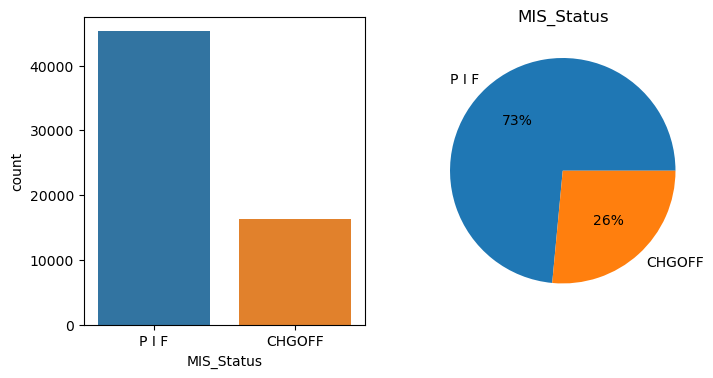

In [ ]:
# Show countplot and pie chart of 'MIS_Status' in df_CA
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=df_CA, x='MIS_Status', ax=ax[0]);
ax[1].pie(df_CA['MIS_Status'].value_counts(),
             labels=df_CA['MIS_Status'].value_counts().index,
             autopct='%d%%');
ax[1].set_title('MIS_Status');

This dataset has an imbalanced target.

It might need oversampling or adding noise when conducting training the model

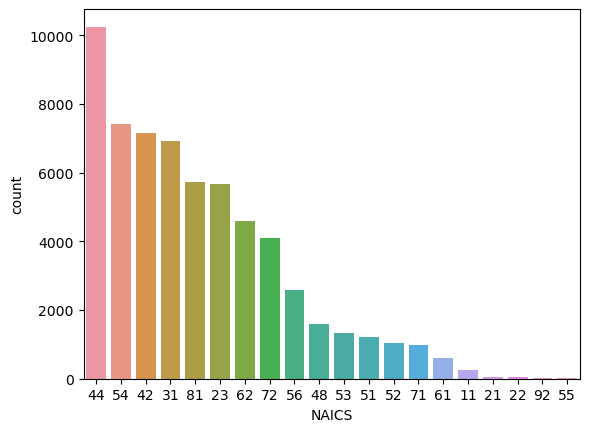

In [ ]:
# Show countplot of 'NAICS'
sns.countplot(df_CA, x='NAICS', order = df_CA['NAICS'].value_counts().index);

From 1987 to 2014, the industry of retail trade receives the most loans in CA.

The second is professional, scientific, and technical services.

The third is wholesale trade.

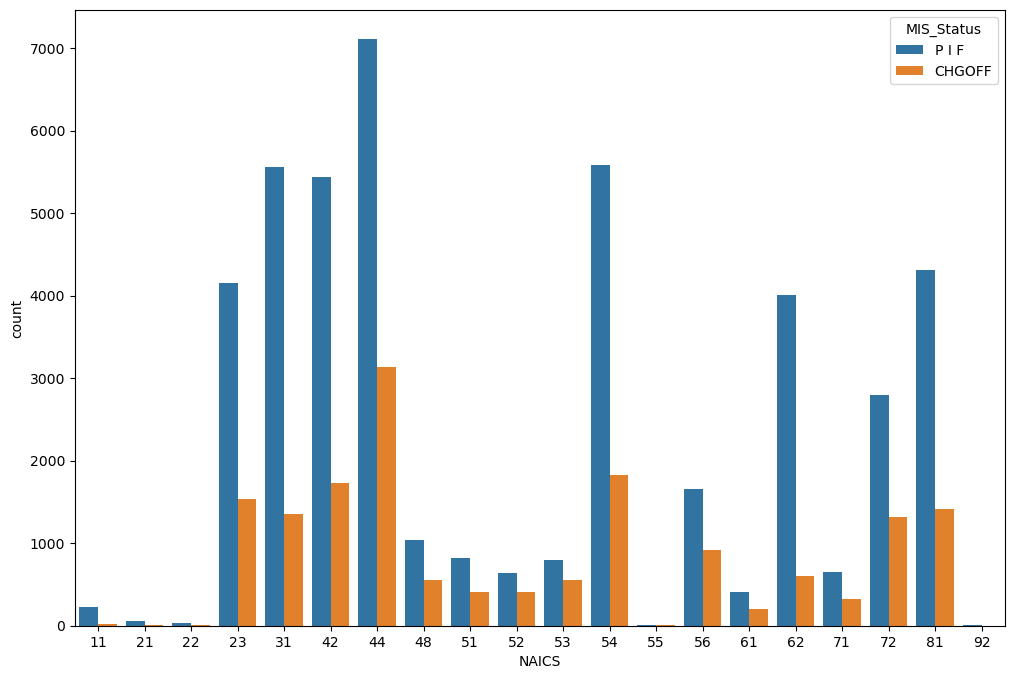

In [ ]:
# Check the total number of each value in 'MIS_Status' by each industry
CA_group_NAIC = df_CA.groupby('NAICS', as_index = False)['MIS_Status'].value_counts()
CA_group_NAIC = pd.DataFrame(CA_group_NAIC)

plt.figure(figsize=(12, 8))
ax = sns.barplot(CA_group_NAIC, x='NAICS', y='count', hue='MIS_Status')

In [ ]:
# Check the proportion of each value in 'MIS_Status' by each industry

# Pivot the table to get 'CHGOFF' and 'P I F' as columns
pivot_NAIC = CA_group_NAIC.pivot(index='NAICS', columns='MIS_Status', values='count').reset_index() #ChatGPT. (GPT-3.5). OpenAI. Accessed: Dec. 09, 2023. [Online]. Available: https://chat.openai.com/
pivot_NAIC['Proportion_CHGOFF'] = pivot_NAIC['CHGOFF'] / (pivot_NAIC['CHGOFF'] + pivot_NAIC['P I F'])
pivot_NAIC['Proportion_CHGOFF'] = pivot_NAIC['Proportion_CHGOFF'].round(3)*100
pivot_NAIC = pivot_NAIC.sort_values(by = 'Proportion_CHGOFF', ascending = False)
print(pivot_NAIC[['NAICS', 'Proportion_CHGOFF']])

MIS_Status  NAICS  Proportion_CHGOFF
10             53               40.8
9              52               39.4
13             56               35.5
7              48               35.0
8              51               33.1
14             61               33.0
16             71               32.9
17             72               32.1
6              44               30.6
3              23               27.0
2              22               26.0
11             54               24.7
18             81               24.7
5              42               24.1
12             55               20.0
4              31               19.6
1              21               14.3
19             92               13.3
15             62               13.0
0              11                8.9


The industry with the highest proportion of defaults is real estate, rental and leasing.

The second is finance and insurance.

The third is administrative/support & waste management/remediation services.

### This case study will be restricted to California and Professional, Scientific, and Technical services in business.

In [ ]:
# Select professional, scientific, and technical services in the column 'NAICS'
df_CA_SC = df_CA.loc[df['NAICS'] == 54]
df_CA_SC

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Franchise,Default
193,1001546003,MEDIA ONE DIGITAL IMAGING LLC,GARDEN GROVE,CA,92841,WELLS FARGO BANK NATL ASSOC,CA,54,2006,2006,...,N,NaN,2006.0,85163,P I F,0,50000,25000,0,0
584,1004345001,"WATERMARK DESIGN ASSOCIATES, L",LOS ANGELES,CA,90068,CALIFORNIA BANK & TRUST,CA,54,2001,2001,...,N,NaN,2001.0,100591,P I F,0,100000,50000,0,0
588,1004365007,"JAMES J. SANCHEZ, A PROFESSION",FRESNO,CA,93711,CALIFORNIA BANK & TRUST,CA,54,2001,2001,...,N,NaN,2001.0,50000,P I F,0,50000,25000,0,0
591,1004385002,"ARTEMIS, A DESIGN AGENCY",SAN DIEGO,CA,92130,CALIFORNIA BANK & TRUST,CA,54,2001,2001,...,N,NaN,2001.0,25000,P I F,0,25000,12500,0,0
594,1004395005,UNIFOR INFORMATION TECHNOLOGIE,IRVINE,CA,92612,CALIFORNIA BANK & TRUST,CA,54,2001,2001,...,N,2007.0,2001.0,99193,CHGOFF,99193,100000,50000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897242,9953263007,DEVRIES DATA SYSTEMS INC.,SAN JOSE,CA,95124,"CAPITAL ACCESS GROUP, INC.",CA,54,1997,1997,...,N,NaN,1997.0,234000,P I F,0,234000,234000,0,0
897377,9956563009,SALIDA VETERINARY HOSPITAL,SALIDA,CA,95356,SUCCESS CAP. EXPANSION & DEVEL,CA,54,1997,1997,...,N,NaN,1997.0,58000,P I F,0,58000,58000,0,0
897831,9965943007,"ROY A NORMAN, ATTORNEY AT LAW",FRESNO,CA,93721,CALIFORNIA BANK & TRUST,CA,54,1997,1997,...,N,NaN,1997.0,85000,P I F,0,85000,68000,0,0
898654,9984793005,"M.J. SYSTEMS, INC.",CITY OF INDUSTRY,CA,91746,CALIFORNIA STATEWIDE CERT. DEV,CA,54,1997,1997,...,N,NaN,1998.0,278000,P I F,0,278000,278000,0,0


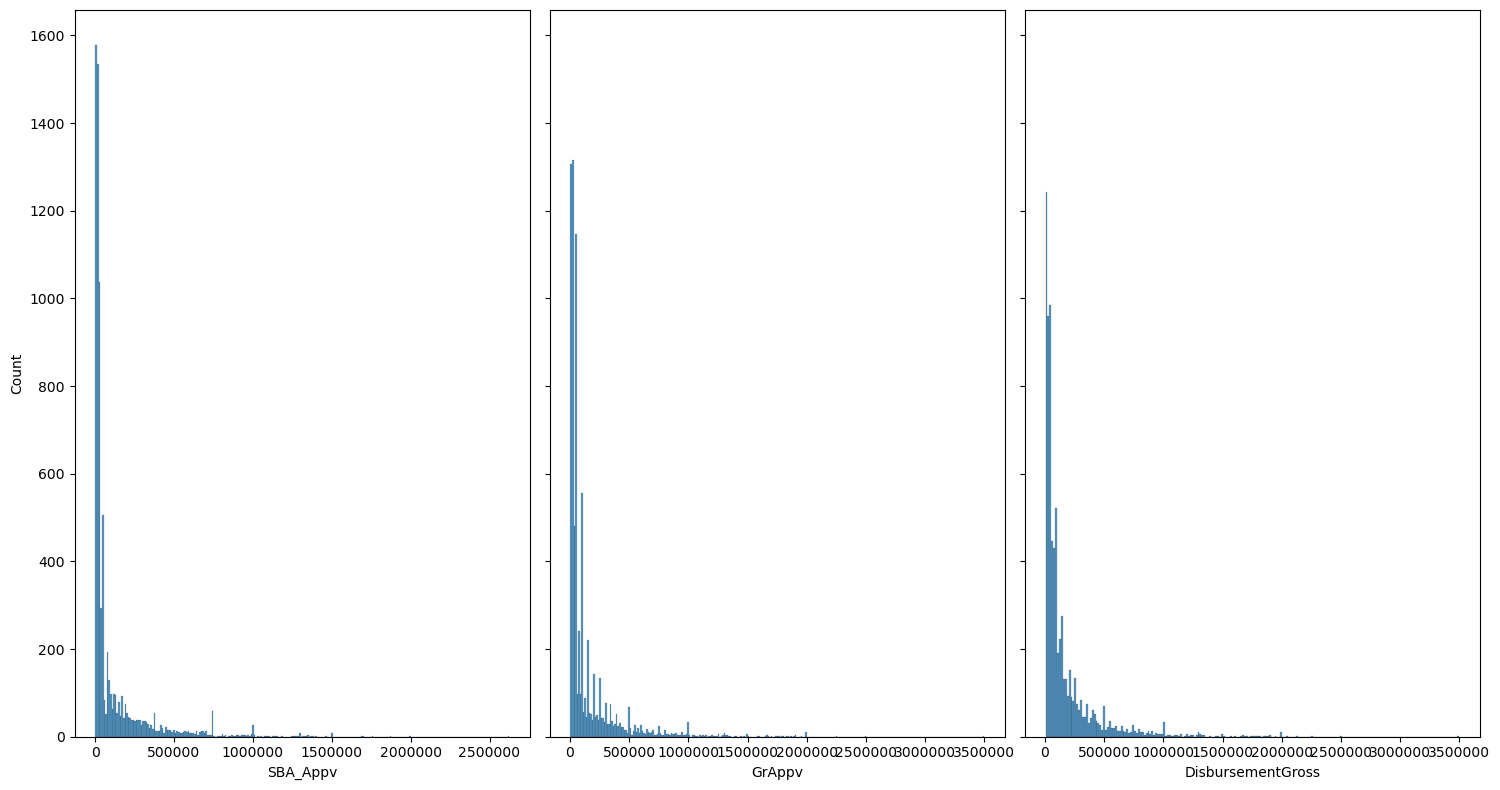

In [ ]:
# Check the distribution of 'SBA_Appv', 'GrAppv' and 'DisbursementGross'
fig, ax = plt.subplots(1, 3, figsize = (15, 8), sharey=True)
sns.histplot(df_CA_SC, x='SBA_Appv', ax=ax[0]);
sns.histplot(df_CA_SC, x='GrAppv', ax=ax[1]);
sns.histplot(df_CA_SC, x='DisbursementGross', ax=ax[2]);
plt.tight_layout()
for axes in ax:
    axes.ticklabel_format(style='plain', axis='x')
plt.show()

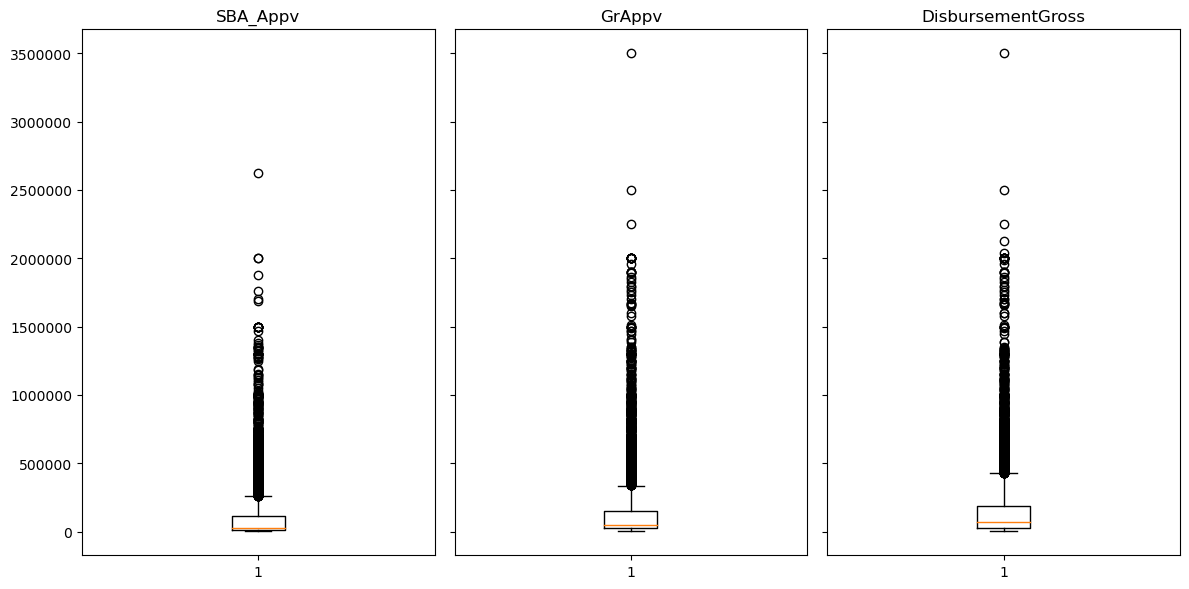

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6), sharey=True)
ax[0].boxplot(df_CA_SC['SBA_Appv']);
ax[0].set_title('SBA_Appv')
ax[0].ticklabel_format(style='plain', axis='y')
ax[1].boxplot(df_CA_SC['GrAppv']);
ax[1].set_title('GrAppv');
ax[1].ticklabel_format(style='plain', axis='y')
ax[2].boxplot(df_CA_SC['DisbursementGross']);
ax[2].set_title('DisbursementGross');
ax[2].ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

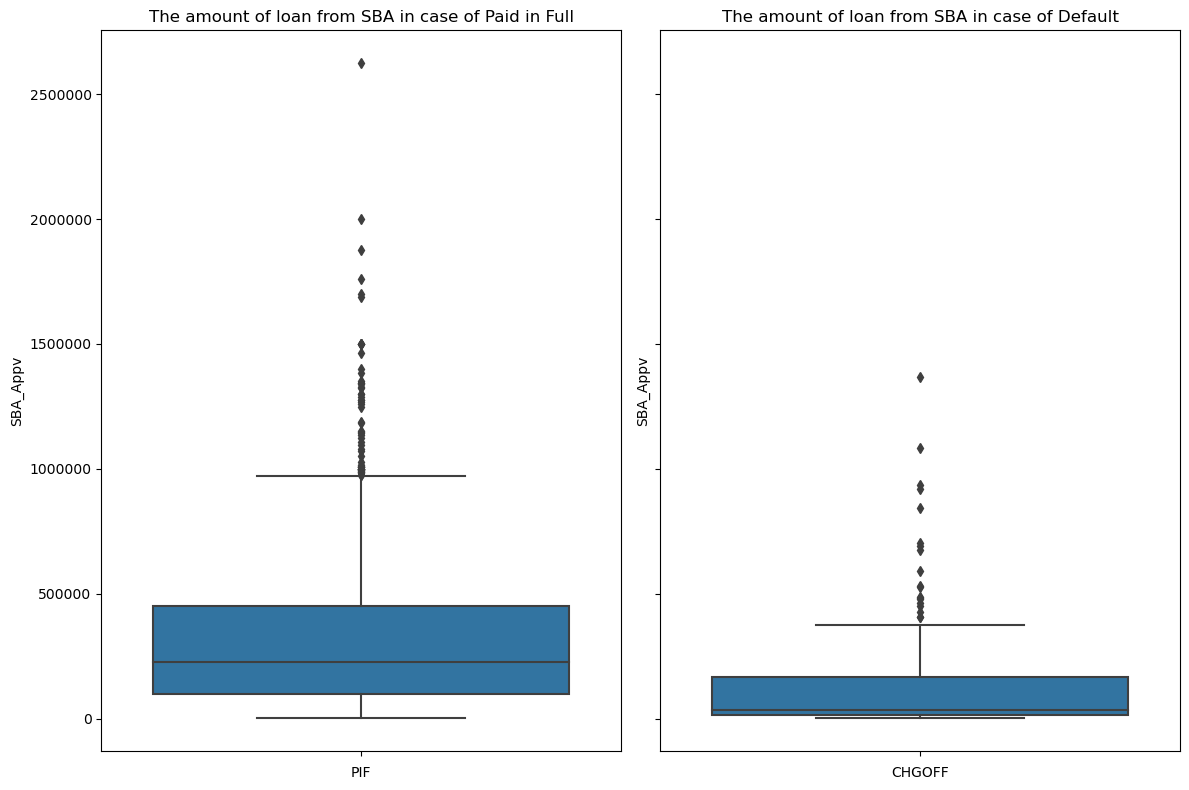

PIF
 count       1337.0
mean      315989.0
std       305987.0
min         2250.0
25%        99450.0
50%       226800.0
75%       448875.0
max      2625000.0
Name: SBA_Appv, dtype: float64

CHGOFF
 count        188.0
mean      132485.0
std       213986.0
min         2500.0
25%        12375.0
50%        33000.0
75%       167915.0
max      1368750.0
Name: SBA_Appv, dtype: float64


In [ ]:
# Check the statistical summary of 'SBA_Appv' by two types of 'MIS_Status'
CA_group_SBA_Appv = df_CA_SC.groupby('MIS_Status', as_index = False)['SBA_Appv'].value_counts()
CA_group_SBA_Appv = pd.DataFrame(CA_group_SBA_Appv)
CA_group_SBA_Appv

CA_group_SBA_Appv_PIF = CA_group_SBA_Appv.loc[CA_group_SBA_Appv['MIS_Status'] == 'P I F']
CA_group_SBA_Appv_CHGOFF = CA_group_SBA_Appv.loc[CA_group_SBA_Appv['MIS_Status'] == 'CHGOFF']

fig, ax = plt.subplots(1, 2, figsize = (12,8), sharey=True)
sns.boxplot(CA_group_SBA_Appv_PIF, y='SBA_Appv', ax=ax[0]);
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_xlabel('PIF');
ax[0].set_title('The amount of loan from SBA in case of Paid in Full');
sns.boxplot(CA_group_SBA_Appv_CHGOFF, y='SBA_Appv', ax=ax[1]);
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_xlabel('CHGOFF');
ax[1].set_title('The amount of loan from SBA in case of Default');
plt.tight_layout()
plt.show()

print('PIF\n', CA_group_SBA_Appv_PIF.SBA_Appv.describe().round())
print()
print('CHGOFF\n',CA_group_SBA_Appv_CHGOFF.SBA_Appv.describe().round())

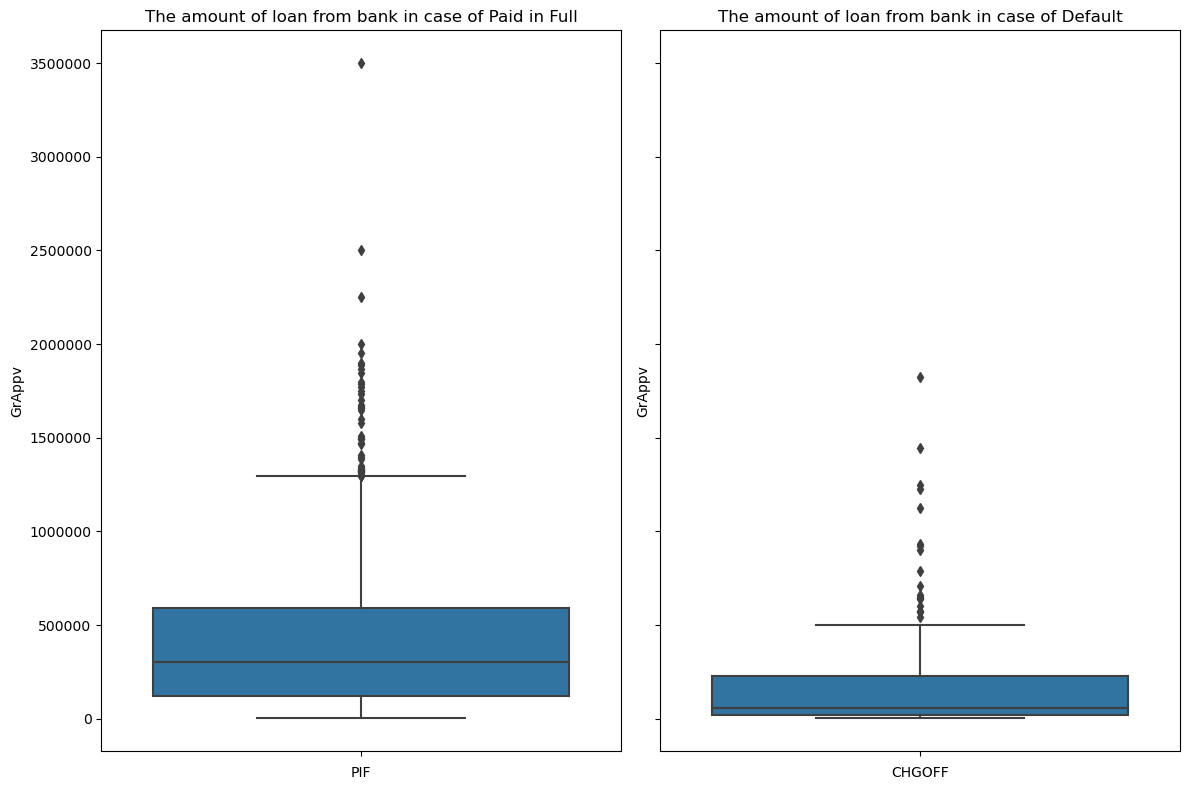

PIF
 count        979.0
mean      415667.0
std       399717.0
min         4500.0
25%       122880.0
50%       301000.0
75%       591600.0
max      3500000.0
Name: GrAppv, dtype: float64

CHGOFF
 count        167.0
mean      188473.0
std       293956.0
min         5000.0
25%        22750.0
50%        56000.0
75%       229130.0
max      1825000.0
Name: GrAppv, dtype: float64


In [ ]:
# Check the statistical summary of 'GrAppv' by two types of 'MIS_Status'
CA_group_GrAppv = df_CA_SC.groupby('MIS_Status', as_index = False)['GrAppv'].value_counts()
CA_group_GrAppv = pd.DataFrame(CA_group_GrAppv)
CA_group_GrAppv

CA_group_GrAppv_PIF = CA_group_GrAppv.loc[CA_group_GrAppv['MIS_Status'] == 'P I F']
CA_group_GrAppv_CHGOFF = CA_group_GrAppv.loc[CA_group_GrAppv['MIS_Status'] == 'CHGOFF']

fig, ax = plt.subplots(1, 2, figsize = (12,8), sharey=True)
sns.boxplot(CA_group_GrAppv_PIF, y='GrAppv', ax=ax[0]);
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_xlabel('PIF');
ax[0].set_title('The amount of loan from bank in case of Paid in Full');
sns.boxplot(CA_group_GrAppv_CHGOFF, y='GrAppv', ax=ax[1]);
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_xlabel('CHGOFF');
ax[1].set_title('The amount of loan from bank in case of Default');
plt.tight_layout()
plt.show()

print('PIF\n', CA_group_GrAppv_PIF.GrAppv.describe().round())
print()
print('CHGOFF\n',CA_group_GrAppv_CHGOFF.GrAppv.describe().round())


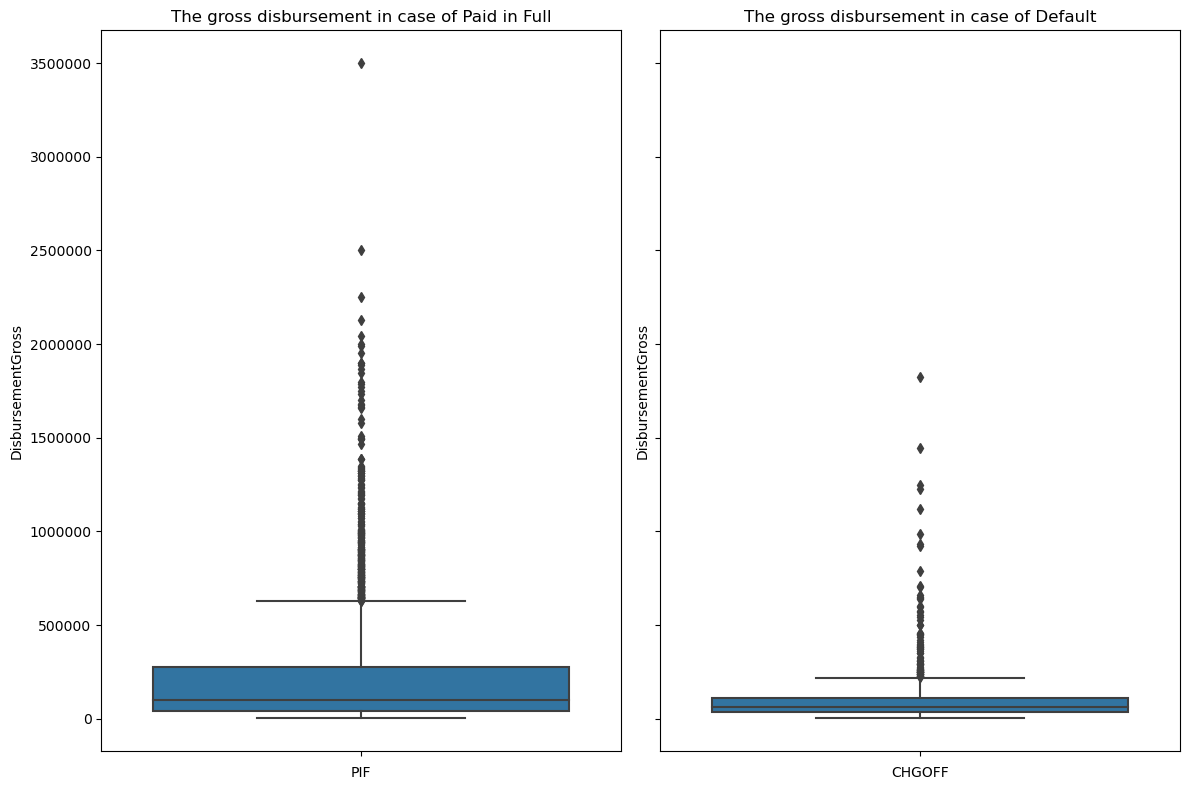

PIF
 count       2625.0
mean      228756.0
std       317425.0
min         4260.0
25%        41783.0
50%        99822.0
75%       277000.0
max      3500000.0
Name: DisbursementGross, dtype: float64

CHGOFF
 count       1079.0
mean       97854.0
std       138156.0
min         5000.0
25%        35105.0
50%        63000.0
75%       109507.0
max      1825000.0
Name: DisbursementGross, dtype: float64


In [ ]:
# Check the statistical summary of 'DisbursementGross' by two types of 'MIS_Status'
CA_group_DGross = df_CA_SC.groupby('MIS_Status', as_index = False)['DisbursementGross'].value_counts()
CA_group_DGross = pd.DataFrame(CA_group_DGross)
CA_group_DGross

CA_group_DGross_PIF = CA_group_DGross.loc[CA_group_DGross['MIS_Status'] == 'P I F']
CA_group_DGross_CHGOFF = CA_group_DGross.loc[CA_group_DGross['MIS_Status'] == 'CHGOFF']

fig, ax = plt.subplots(1, 2, figsize = (12,8), sharey=True)
sns.boxplot(CA_group_DGross_PIF, y='DisbursementGross', ax=ax[0]);
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_xlabel('PIF');
ax[0].set_title('The gross disbursement in case of Paid in Full');
sns.boxplot(CA_group_DGross_CHGOFF, y='DisbursementGross', ax=ax[1]);
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_xlabel('CHGOFF');
ax[1].set_title('The gross disbursement in case of Default');
plt.tight_layout()
plt.show()

print('PIF\n', CA_group_DGross_PIF.DisbursementGross.describe().round())
print()
print('CHGOFF\n',CA_group_DGross_CHGOFF.DisbursementGross.describe().round())


Overall, companies that default have lower loan amounts.

In [ ]:
#Since SBA's loans are a subsidy to bank loans, it is necessary to create a new feature referring to the ratio of SBA loans ('SBA_Appv') to bank loans ('GrAppv')
df_CA_SC['SBA_proportion'] = (df_CA_SC['SBA_Appv'] / (df_CA_SC['SBA_Appv']+df_CA_SC['GrAppv'])).round(3)*100
df_CA_SC

C:\Users\Yumi\AppData\Local\Temp\ipykernel_16896\4004646117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CA_SC['SBA_proportion'] = (df_CA_SC['SBA_Appv'] / (df_CA_SC['SBA_Appv']+df_CA_SC['GrAppv'])).round(3)*100


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ChgOffDate,DisbursementDate,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Franchise,Default,SBA_proportion
193,1001546003,MEDIA ONE DIGITAL IMAGING LLC,GARDEN GROVE,CA,92841,WELLS FARGO BANK NATL ASSOC,CA,54,2006,2006,...,NaN,2006.0,85163,P I F,0,50000,25000,0,0,33.3
584,1004345001,"WATERMARK DESIGN ASSOCIATES, L",LOS ANGELES,CA,90068,CALIFORNIA BANK & TRUST,CA,54,2001,2001,...,NaN,2001.0,100591,P I F,0,100000,50000,0,0,33.3
588,1004365007,"JAMES J. SANCHEZ, A PROFESSION",FRESNO,CA,93711,CALIFORNIA BANK & TRUST,CA,54,2001,2001,...,NaN,2001.0,50000,P I F,0,50000,25000,0,0,33.3
591,1004385002,"ARTEMIS, A DESIGN AGENCY",SAN DIEGO,CA,92130,CALIFORNIA BANK & TRUST,CA,54,2001,2001,...,NaN,2001.0,25000,P I F,0,25000,12500,0,0,33.3
594,1004395005,UNIFOR INFORMATION TECHNOLOGIE,IRVINE,CA,92612,CALIFORNIA BANK & TRUST,CA,54,2001,2001,...,2007.0,2001.0,99193,CHGOFF,99193,100000,50000,0,1,33.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897242,9953263007,DEVRIES DATA SYSTEMS INC.,SAN JOSE,CA,95124,"CAPITAL ACCESS GROUP, INC.",CA,54,1997,1997,...,NaN,1997.0,234000,P I F,0,234000,234000,0,0,50.0
897377,9956563009,SALIDA VETERINARY HOSPITAL,SALIDA,CA,95356,SUCCESS CAP. EXPANSION & DEVEL,CA,54,1997,1997,...,NaN,1997.0,58000,P I F,0,58000,58000,0,0,50.0
897831,9965943007,"ROY A NORMAN, ATTORNEY AT LAW",FRESNO,CA,93721,CALIFORNIA BANK & TRUST,CA,54,1997,1997,...,NaN,1997.0,85000,P I F,0,85000,68000,0,0,44.4
898654,9984793005,"M.J. SYSTEMS, INC.",CITY OF INDUSTRY,CA,91746,CALIFORNIA STATEWIDE CERT. DEV,CA,54,1997,1997,...,NaN,1998.0,278000,P I F,0,278000,278000,0,0,50.0


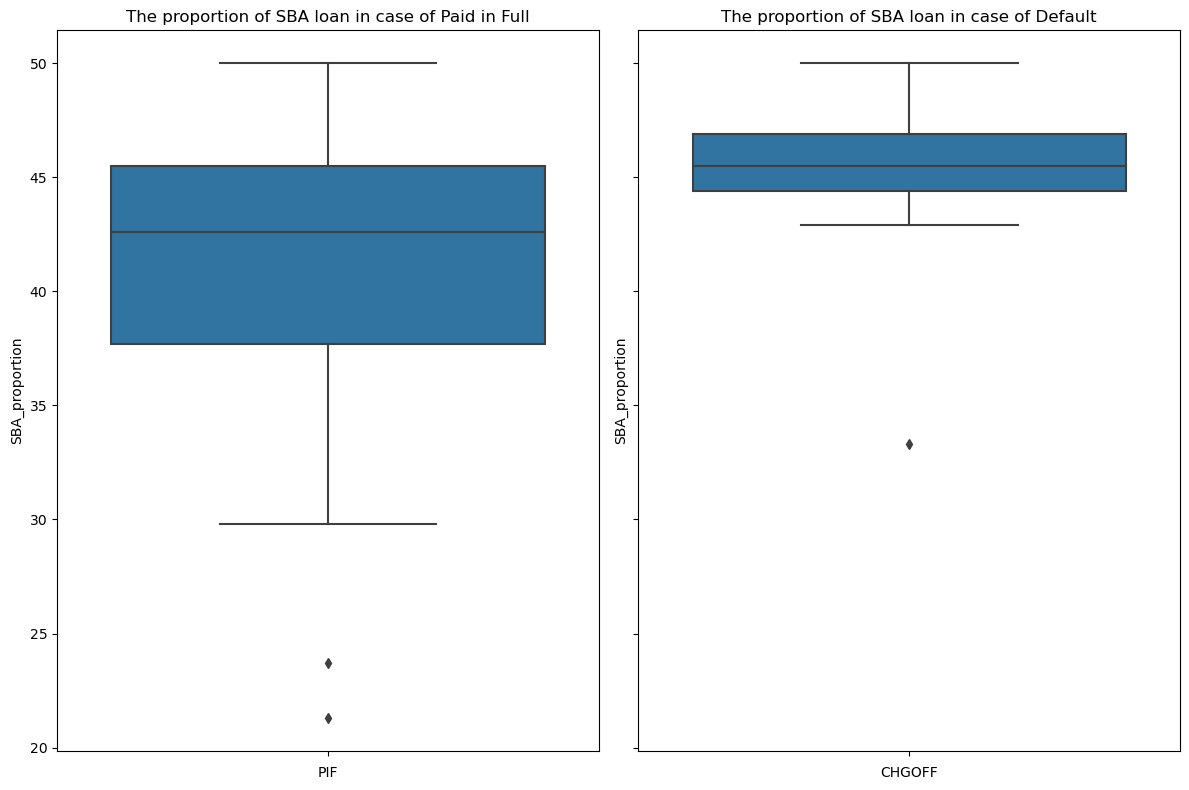

PIF
 count    61.0
mean     41.0
std       6.0
min      21.0
25%      38.0
50%      43.0
75%      46.0
max      50.0
Name: SBA_proportion, dtype: float64

CHGOFF
 count     9.0
mean     45.0
std       5.0
min      33.0
25%      44.0
50%      46.0
75%      47.0
max      50.0
Name: SBA_proportion, dtype: float64


In [ ]:
# Check the statistical summary of 'SBA_proportion' by two types of 'MIS_Status'
CA_group_SBA_proportion = df_CA_SC.groupby('MIS_Status', as_index = False)['SBA_proportion'].value_counts()
CA_group_SBA_proportion = pd.DataFrame(CA_group_SBA_proportion)
CA_group_SBA_proportion

CA_group_SBA_proportion_PIF = CA_group_SBA_proportion.loc[CA_group_SBA_proportion['MIS_Status'] == 'P I F']
CA_group_SBA_proportion_CHGOFF = CA_group_SBA_proportion.loc[CA_group_SBA_proportion['MIS_Status'] == 'CHGOFF']

fig, ax = plt.subplots(1, 2, figsize = (12,8), sharey=True)
sns.boxplot(CA_group_SBA_proportion_PIF, y='SBA_proportion', ax=ax[0]);
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_xlabel('PIF');
ax[0].set_title('The proportion of SBA loan in case of Paid in Full');
sns.boxplot(CA_group_SBA_proportion_CHGOFF, y='SBA_proportion', ax=ax[1]);
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_xlabel('CHGOFF');
ax[1].set_title('The proportion of SBA loan in case of Default');
plt.tight_layout()
plt.show()

print('PIF\n', CA_group_SBA_proportion_PIF.SBA_proportion.describe().round())
print()
print('CHGOFF\n',CA_group_SBA_proportion_CHGOFF.SBA_proportion.describe().round())


The businesses which default have a little higher proportion of SBA loan from the total bank loan.

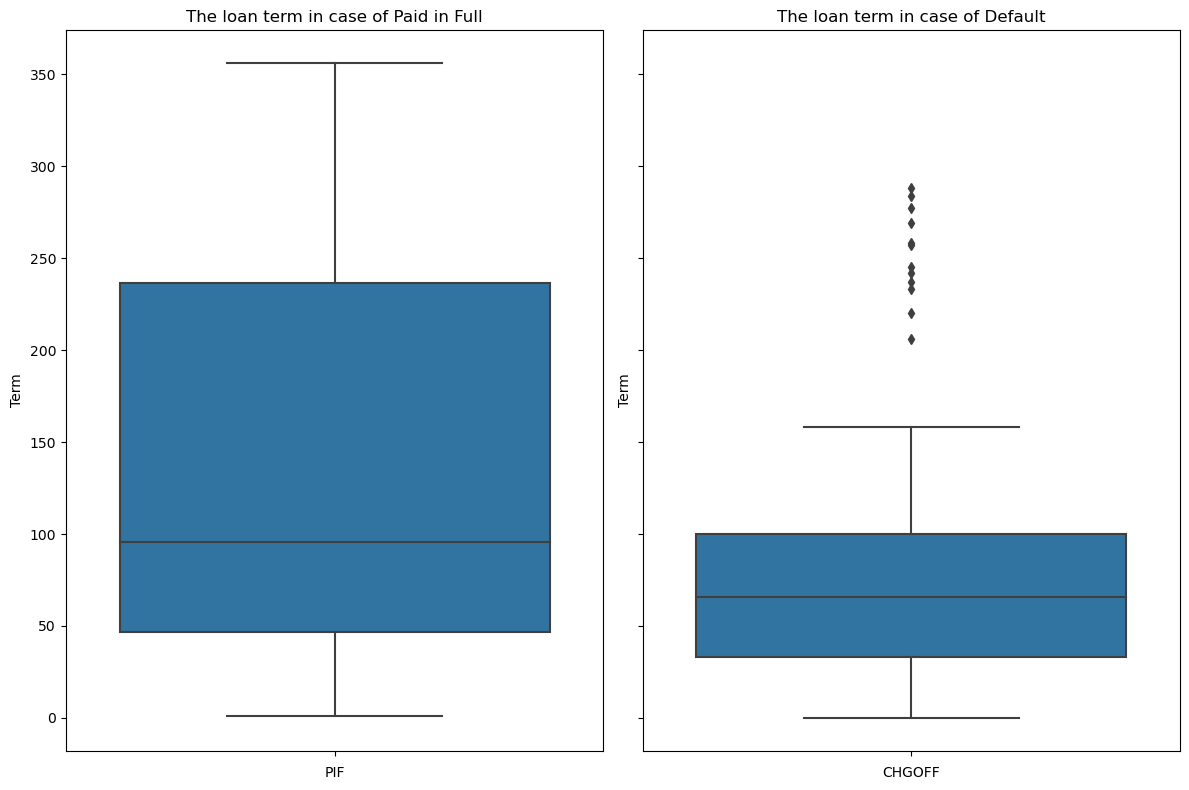

PIF
 count    176.0
mean     132.0
std      102.0
min        1.0
25%       47.0
50%       96.0
75%      236.0
max      356.0
Name: Term, dtype: float64

CHGOFF
 count    133.0
mean      78.0
std       66.0
min        0.0
25%       33.0
50%       66.0
75%      100.0
max      288.0
Name: Term, dtype: float64


In [ ]:
# Check the statistical summary of 'Term' by two types of 'MIS_Status'
CA_group_term = df_CA_SC.groupby('MIS_Status', as_index = False)['Term'].value_counts()
CA_group_term = pd.DataFrame(CA_group_term)
CA_group_term

CA_group_term_PIF = CA_group_term.loc[CA_group_term['MIS_Status'] == 'P I F']
CA_group_term_CHGOFF = CA_group_term.loc[CA_group_term['MIS_Status'] == 'CHGOFF']

fig, ax = plt.subplots(1, 2, figsize = (12,8), sharey=True)
sns.boxplot(CA_group_term_PIF, y='Term', ax=ax[0]);
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_xlabel('PIF');
ax[0].set_title('The loan term in case of Paid in Full');
sns.boxplot(CA_group_term_CHGOFF, y='Term', ax=ax[1]);
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_xlabel('CHGOFF');
ax[1].set_title('The loan term in case of Default');
plt.tight_layout()
plt.show()

print('PIF\n', CA_group_term_PIF.Term.describe().round())
print()
print('CHGOFF\n',CA_group_term_CHGOFF.Term.describe().round())


In case of default, the loan period is shorter than that of a company that fully repays the loan.

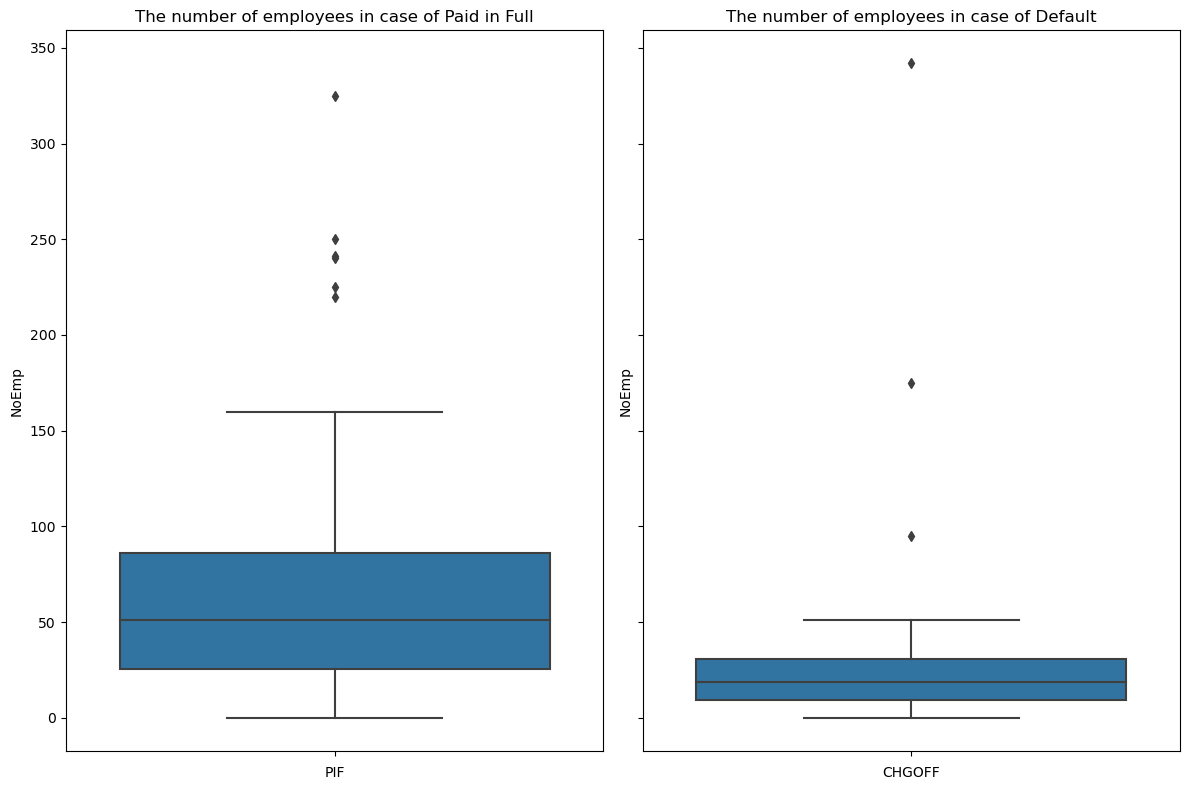

PIF
 count    103.0
mean      66.0
std       60.0
min        0.0
25%       26.0
50%       51.0
75%       86.0
max      325.0
Name: NoEmp, dtype: float64

CHGOFF
 count     39.0
mean      34.0
std       59.0
min        0.0
25%       10.0
50%       19.0
75%       31.0
max      342.0
Name: NoEmp, dtype: float64


In [ ]:
# Check the statistical summary of 'NoEmp' by two types of 'MIS_Status'
CA_group_NoEmp = df_CA_SC.groupby('MIS_Status', as_index = False)['NoEmp'].value_counts()
CA_group_NoEmp = pd.DataFrame(CA_group_NoEmp)
CA_group_NoEmp

CA_group_NoEmp_PIF = CA_group_NoEmp.loc[CA_group_NoEmp['MIS_Status'] == 'P I F']
CA_group_NoEmp_CHGOFF = CA_group_NoEmp.loc[CA_group_NoEmp['MIS_Status'] == 'CHGOFF']

fig, ax = plt.subplots(1, 2, figsize = (12,8), sharey=True)
sns.boxplot(CA_group_NoEmp_PIF, y='NoEmp', ax=ax[0]);
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_xlabel('PIF');
ax[0].set_title('The number of employees in case of Paid in Full');
sns.boxplot(CA_group_NoEmp_CHGOFF, y='NoEmp', ax=ax[1]);
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_xlabel('CHGOFF');
ax[1].set_title('The number of employees in case of Default');
plt.tight_layout()
plt.show()

print('PIF\n', CA_group_NoEmp_PIF.NoEmp.describe().round())
print()
print('CHGOFF\n',CA_group_NoEmp_CHGOFF.NoEmp.describe().round())


In the case of default, the average number of employees is smaller that that of paid-in-full companies

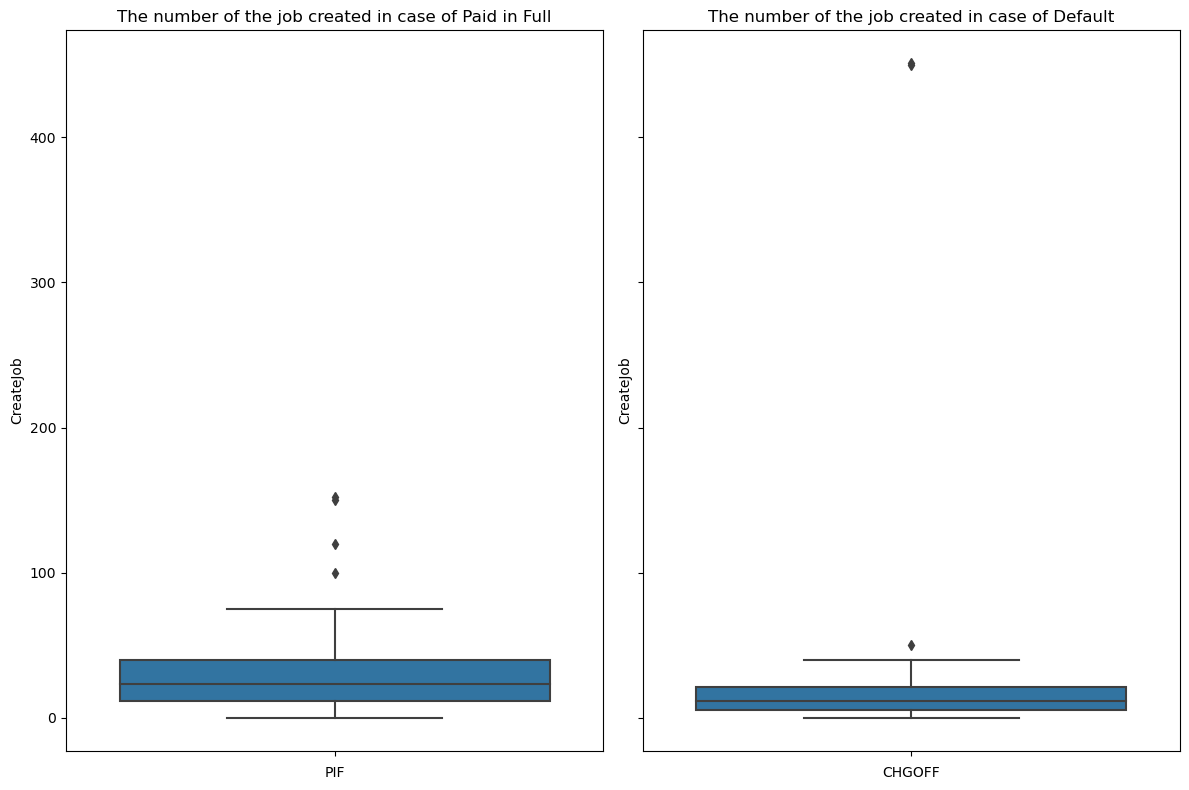

PIF
 count     48.0
mean      34.0
std       35.0
min        0.0
25%       12.0
50%       24.0
75%       40.0
max      152.0
Name: CreateJob, dtype: float64

CHGOFF
 count     24.0
mean      50.0
std      124.0
min        0.0
25%        6.0
50%       12.0
75%       21.0
max      451.0
Name: CreateJob, dtype: float64


In [ ]:
# Check the statistical summary of 'CreateJob' by two types of 'MIS_Status'
CA_group_cjob = df_CA_SC.groupby('MIS_Status', as_index = False)['CreateJob'].value_counts()
CA_group_cjob = pd.DataFrame(CA_group_cjob)
CA_group_cjob

CA_group_cjob_PIF = CA_group_cjob.loc[CA_group_cjob['MIS_Status'] == 'P I F']
CA_group_cjob_CHGOFF = CA_group_cjob.loc[CA_group_cjob['MIS_Status'] == 'CHGOFF']

fig, ax = plt.subplots(1, 2, figsize = (12,8), sharey=True)
sns.boxplot(CA_group_cjob_PIF, y='CreateJob', ax=ax[0]);
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_xlabel('PIF');
ax[0].set_title('The number of the job created in case of Paid in Full');
sns.boxplot(CA_group_cjob_CHGOFF, y='CreateJob', ax=ax[1]);
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_xlabel('CHGOFF');
ax[1].set_title('The number of the job created in case of Default');
plt.tight_layout()
plt.show()

print('PIF\n', CA_group_cjob_PIF.CreateJob.describe().round())
print()
print('CHGOFF\n',CA_group_cjob_CHGOFF.CreateJob.describe().round())


In the case of default, the average number of new jobs created is smaller that that of paid-in-full companies

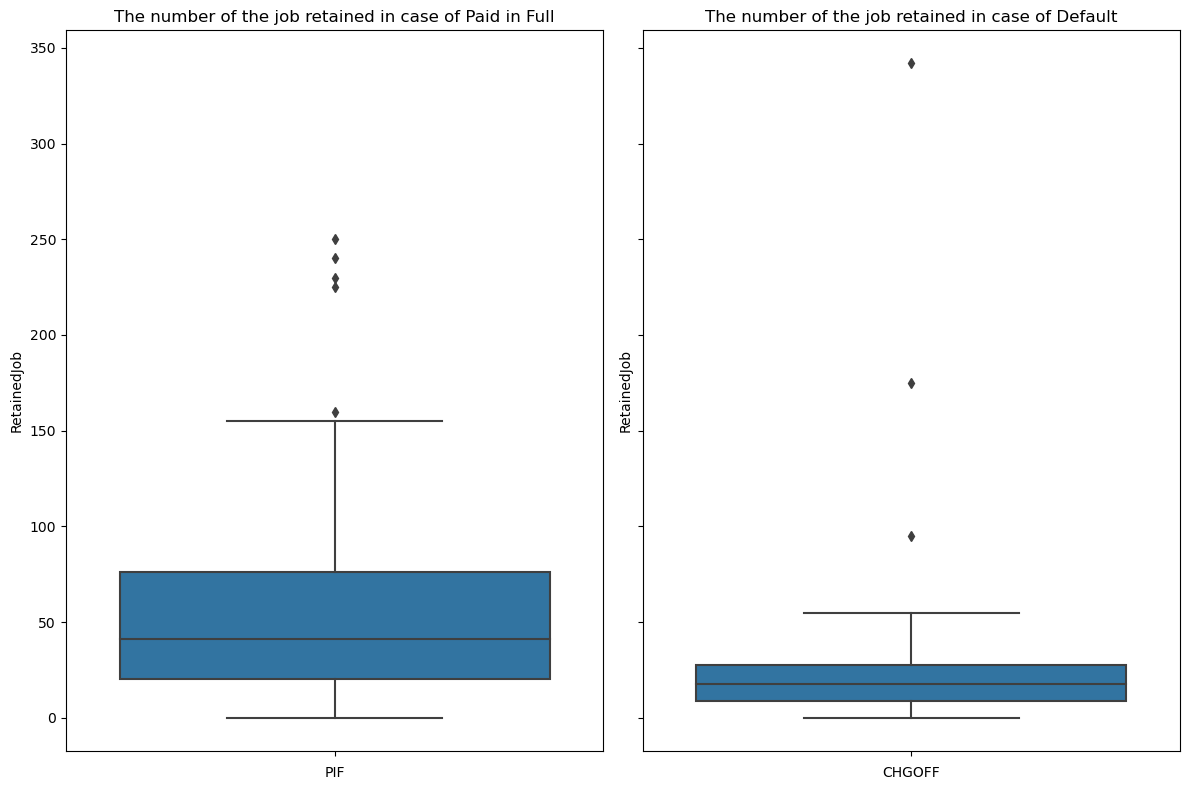

PIF
 count     83.0
mean      59.0
std       57.0
min        0.0
25%       20.0
50%       41.0
75%       76.0
max      250.0
Name: RetainedJob, dtype: float64

CHGOFF
 count     36.0
mean      34.0
std       62.0
min        0.0
25%        9.0
50%       18.0
75%       28.0
max      342.0
Name: RetainedJob, dtype: float64


In [ ]:
# Check the statistical summary of 'RetainedJob' by two types of 'MIS_Status'
CA_group_rjob = df_CA_SC.groupby('MIS_Status', as_index = False)['RetainedJob'].value_counts()
CA_group_rjob = pd.DataFrame(CA_group_rjob)
CA_group_rjob

CA_group_rjob_PIF = CA_group_rjob.loc[CA_group_rjob['MIS_Status'] == 'P I F']
CA_group_rjob_CHGOFF = CA_group_rjob.loc[CA_group_rjob['MIS_Status'] == 'CHGOFF']

fig, ax = plt.subplots(1, 2, figsize = (12,8), sharey=True)
sns.boxplot(CA_group_rjob_PIF, y='RetainedJob', ax=ax[0])
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_xlabel('PIF');
ax[0].set_title('The number of the job retained in case of Paid in Full');
sns.boxplot(CA_group_rjob_CHGOFF, y='RetainedJob', ax=ax[1]);
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_xlabel('CHGOFF');
ax[1].set_title('The number of the job retained in case of Default');
plt.tight_layout()
plt.show()

print('PIF\n', CA_group_rjob_PIF.RetainedJob.describe().round())
print()
print('CHGOFF\n',CA_group_rjob_CHGOFF.RetainedJob.describe().round())


In the case of default, the average number of retained jobs is smaller that that of paid-in-full companies

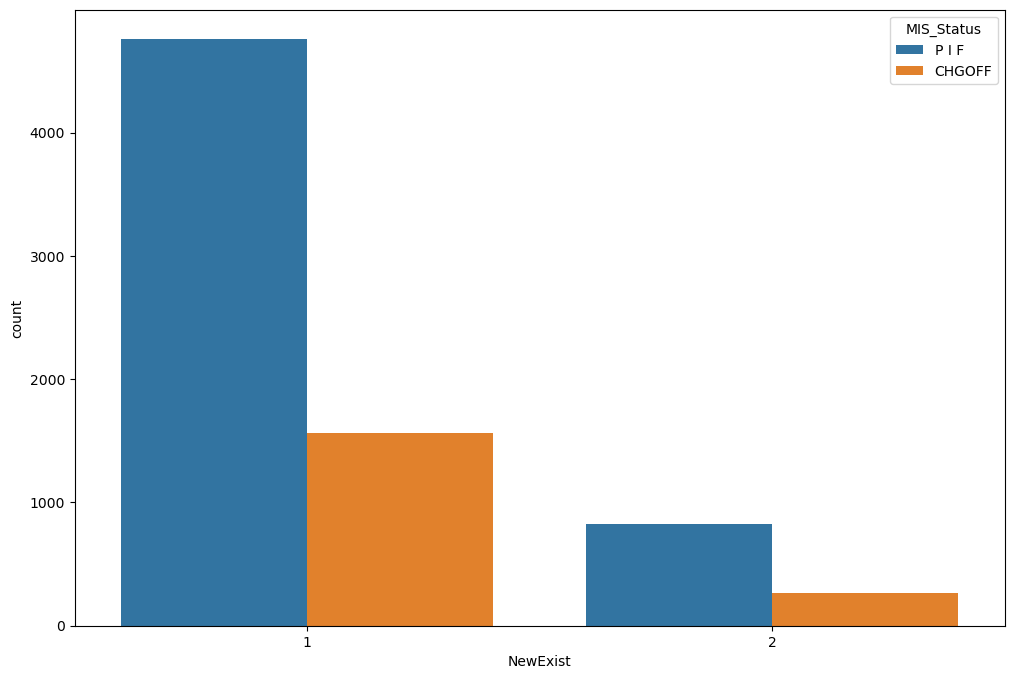

In [ ]:
#Check the total number of each value in 'MIS_Status' based on whether the business is new or existing
CA_group_ne = df_CA_SC.groupby('NewExist', as_index = False)['MIS_Status'].value_counts()
CA_group_ne = pd.DataFrame(CA_group_ne)

plt.figure(figsize=(12, 8))
ax = sns.barplot(CA_group_ne, x='NewExist', y='count', hue='MIS_Status')

1 = Existing business
2 = New business

This feature is also imbalanvced.

In [ ]:
# Check the proportion of each value in 'MIS_Status' based on whether the business is new or existing

# Pivot the table to get 'CHGOFF' and 'P I F' as columns
pivot_ne = CA_group_ne.pivot(index='NewExist', columns='MIS_Status', values='count').reset_index() #ChatGPT. (GPT-3.5). OpenAI. Accessed: Dec. 09, 2023. [Online]. Available: https://chat.openai.com/
pivot_ne['Proportion_CHGOFF'] = pivot_ne['CHGOFF'] / (pivot_ne['CHGOFF'] + pivot_ne['P I F'])
pivot_ne['Proportion_CHGOFF'] = pivot_ne['Proportion_CHGOFF'].round(3)*100
pivot_ne = pivot_ne.sort_values(by = 'Proportion_CHGOFF', ascending = False)
print(pivot_ne[['NewExist', 'Proportion_CHGOFF']])

MIS_Status  NewExist  Proportion_CHGOFF
0                  1               24.7
1                  2               24.4


However, the proportion of default is almost same in two types in 'NewExist'.

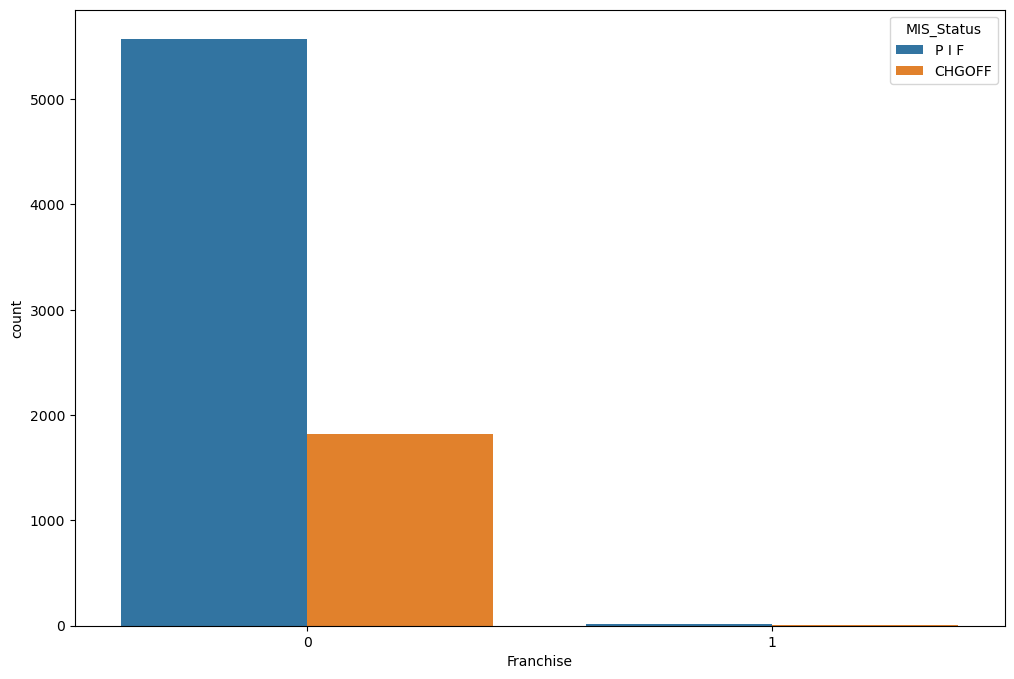

In [ ]:
#Check the total number of each value in 'MIS_Status' based on whether the business has a franchise or not
CA_group_fr = df_CA_SC.groupby('Franchise', as_index = False)['MIS_Status'].value_counts()
CA_group_fr = pd.DataFrame(CA_group_fr)

plt.figure(figsize=(12, 8))
ax = sns.barplot(CA_group_fr, x='Franchise', y='count', hue='MIS_Status')

In [ ]:
# Check the proportion of each value in 'MIS_Status' based on whether the business has a franchise or not

# Pivot the table to get 'CHGOFF' and 'P I F' as columns
pivot_fr = CA_group_fr.pivot(index='Franchise', columns='MIS_Status', values='count').reset_index() #ChatGPT. (GPT-3.5). OpenAI. Accessed: Dec. 09, 2023. [Online]. Available: https://chat.openai.com/
pivot_fr['Proportion_CHGOFF'] = pivot_fr['CHGOFF'] / (pivot_fr['CHGOFF'] + pivot_fr['P I F'])
pivot_fr['Proportion_CHGOFF'] = pivot_fr['Proportion_CHGOFF'].round(3)*100
pivot_fr = pivot_fr.sort_values(by = 'Proportion_CHGOFF', ascending = False)
print(pivot_fr[['Franchise', 'Proportion_CHGOFF']])

MIS_Status  Franchise  Proportion_CHGOFF
1                   1               31.6
0                   0               24.6


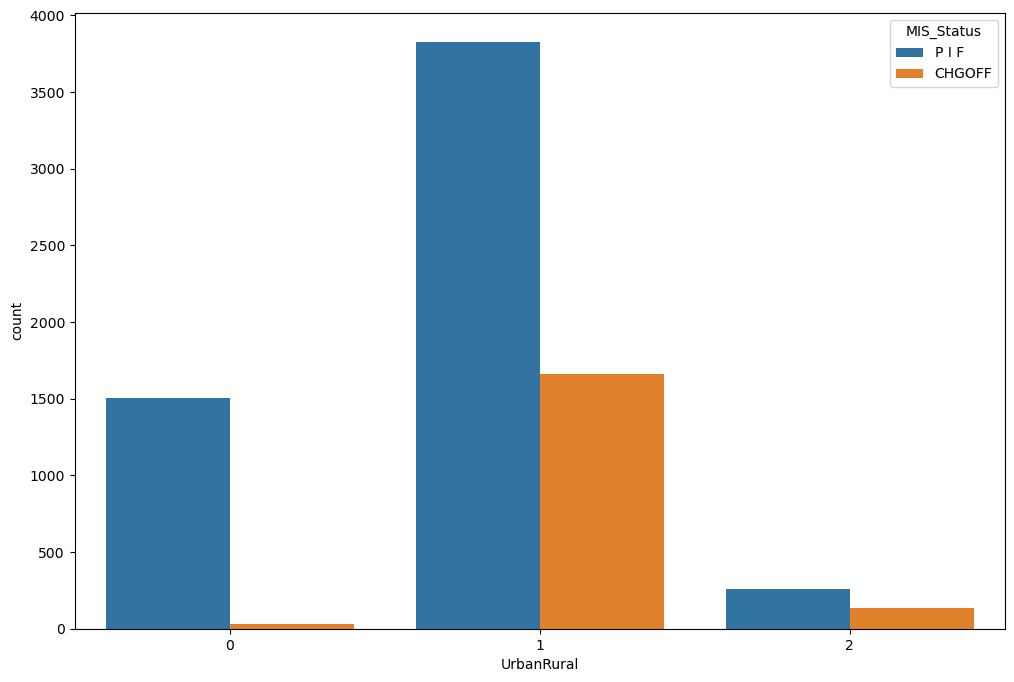

In [ ]:
#Check the total number of each value in 'MIS_Status' for three types of area in businesses
CA_group_ur = df_CA_SC.groupby('UrbanRural', as_index = False)['MIS_Status'].value_counts()
CA_group_ur = pd.DataFrame(CA_group_ur)

plt.figure(figsize=(12, 8))
ax = sns.barplot(CA_group_ur, x='UrbanRural', y='count', hue='MIS_Status')

In [ ]:
# Check the proportion of each value in 'MIS_Status' for three types of area in businesses

# Pivot the table to get 'CHGOFF' and 'P I F' as columns
pivot_ur = CA_group_ur.pivot(index='UrbanRural', columns='MIS_Status', values='count').reset_index() #ChatGPT. (GPT-3.5). OpenAI. Accessed: Dec. 09, 2023. [Online]. Available: https://chat.openai.com/
pivot_ur['Proportion_CHGOFF'] = pivot_ur['CHGOFF'] / (pivot_ur['CHGOFF'] + pivot_ur['P I F'])
pivot_ur['Proportion_CHGOFF'] = pivot_ur['Proportion_CHGOFF'].round(3)*100
pivot_ur = pivot_ur.sort_values(by = 'Proportion_CHGOFF', ascending = False)
print(pivot_ur[['UrbanRural', 'Proportion_CHGOFF']])

MIS_Status  UrbanRural  Proportion_CHGOFF
2                    2               34.9
1                    1               30.3
0                    0                1.9


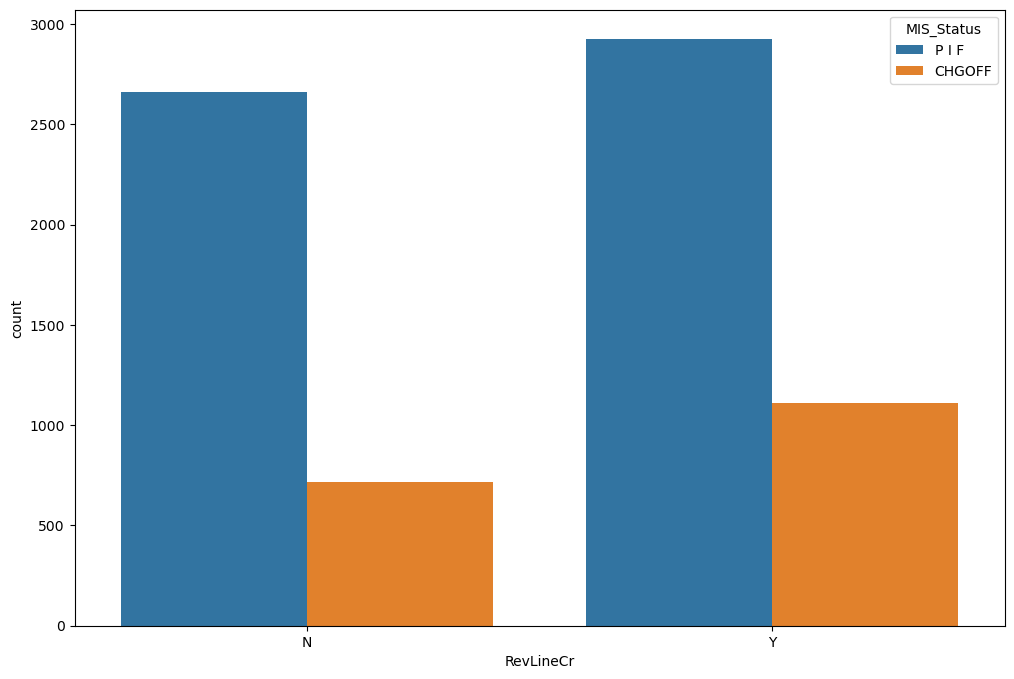

In [ ]:
#Check the total number of each value in 'MIS_Status' based on revolving line of credit
CA_group_rc = df_CA_SC.groupby('RevLineCr', as_index = False)['MIS_Status'].value_counts()
CA_group_rc = pd.DataFrame(CA_group_rc)

plt.figure(figsize=(12, 8))
ax = sns.barplot(CA_group_rc, x='RevLineCr', y='count', hue='MIS_Status')

In [ ]:
# Check the proportion of each value in 'MIS_Status' based on revolving line of credit

# Pivot the table to get 'CHGOFF' and 'P I F' as columns
pivot_rc = CA_group_rc.pivot(index='RevLineCr', columns='MIS_Status', values='count').reset_index() #ChatGPT. (GPT-3.5). OpenAI. Accessed: Dec. 09, 2023. [Online]. Available: https://chat.openai.com/
pivot_rc['Proportion_CHGOFF'] = pivot_rc['CHGOFF'] / (pivot_rc['CHGOFF'] + pivot_rc['P I F'])
pivot_rc['Proportion_CHGOFF'] = pivot_rc['Proportion_CHGOFF'].round(3)*100
pivot_rc = pivot_rc.sort_values(by = 'Proportion_CHGOFF', ascending = False)
print(pivot_rc[['RevLineCr', 'Proportion_CHGOFF']])

MIS_Status RevLineCr  Proportion_CHGOFF
1                  Y               27.5
0                  N               21.2


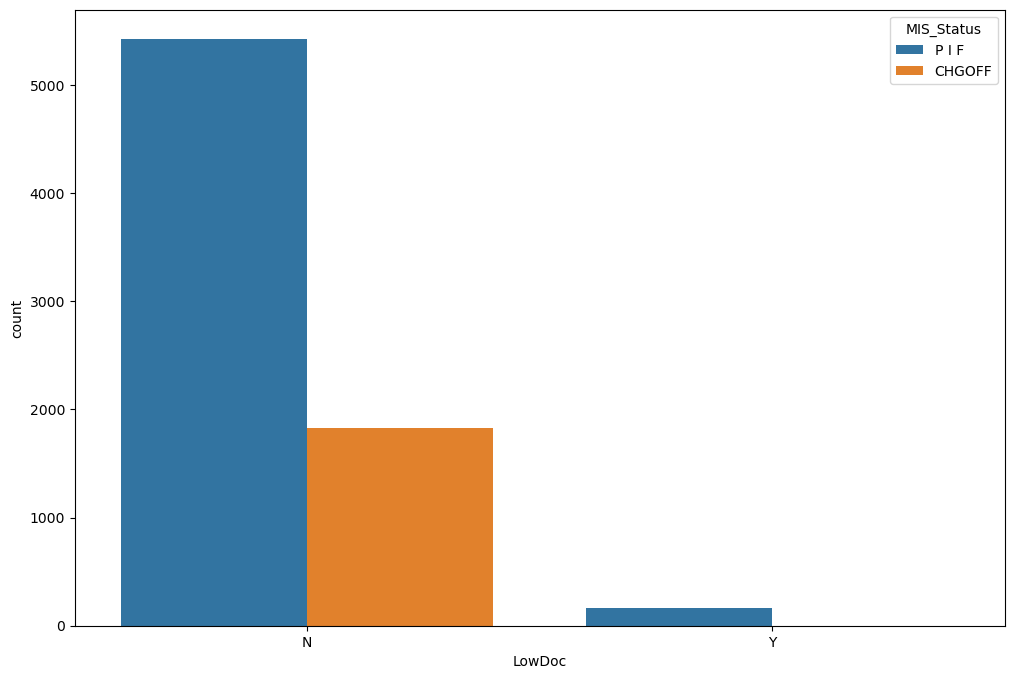

In [ ]:
#Check the total number of each value in 'MIS_Status' based on LowDoc loan programme
CA_group_ld = df_CA_SC.groupby('LowDoc', as_index = False)['MIS_Status'].value_counts()
CA_group_ld = pd.DataFrame(CA_group_ld)

plt.figure(figsize=(12, 8))
ax = sns.barplot(CA_group_ld, x='LowDoc', y='count', hue='MIS_Status')

In [ ]:
# Check the proportion of each value in 'MIS_Status' based on LowDoc loan programme

# Pivot the table to get 'CHGOFF' and 'P I F' as columns
pivot_ld = CA_group_ld.pivot(index='LowDoc', columns='MIS_Status', values='count').reset_index() #ChatGPT. (GPT-3.5). OpenAI. Accessed: Dec. 09, 2023. [Online]. Available: https://chat.openai.com/
pivot_ld['Proportion_CHGOFF'] = pivot_ld['CHGOFF'] / (pivot_ld['CHGOFF'] + pivot_ld['P I F'])
pivot_ld['Proportion_CHGOFF'] = pivot_ld['Proportion_CHGOFF'].round(3)*100
pivot_ld = pivot_ld.sort_values(by = 'Proportion_CHGOFF', ascending = False)
print(pivot_ld[['LowDoc', 'Proportion_CHGOFF']])

MIS_Status LowDoc  Proportion_CHGOFF
0               N               25.2
1               Y                0.6


In [ ]:
df_CA_SC.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'Franchise',
       'Default', 'SBA_proportion'],
      dtype='object')

In [ ]:
# Select significant features for new dataset to build models
# 'LoanNr_ChkDgt' and 'FranchiseCode' are removed as these features are a similar to each company's granted number for loan
# Some features which are string type of data such as 'Name', 'City', etc, are removed
# Some features which indicate year or date are removed as there is the feature 'Term' which is about the term to repay the loan
data = df_CA_SC[['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'UrbanRural', 'RevLineCr', 'LowDoc', 'DisbursementGross', 'GrAppv', 'SBA_Appv', 'Franchise', 'SBA_proportion', 'Default']].reset_index()
data = data.drop('index', axis=1)
data

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,SBA_Appv,Franchise,SBA_proportion,Default
0,60,7,1,3,10,1,Y,N,85163,50000,25000,0,33.3,0
1,7,15,1,0,0,0,Y,N,100591,100000,50000,0,33.3,0
2,84,5,1,0,0,0,N,N,50000,50000,25000,0,33.3,0
3,36,2,1,0,0,0,Y,N,25000,25000,12500,0,33.3,0
4,4,8,1,0,0,0,Y,N,99193,100000,50000,0,33.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7407,240,9,1,14,0,0,N,N,234000,234000,234000,0,50.0,0
7408,240,3,1,2,1,0,N,N,58000,58000,58000,0,50.0,0
7409,84,3,2,0,0,0,N,N,85000,85000,68000,0,44.4,0
7410,240,30,1,15,15,0,N,N,278000,278000,278000,0,50.0,0


In [ ]:
# Change the string data in 'RevLineCr' and 'LowDoc' to integer for modeling
data['RevLineCr'] = data['RevLineCr'].apply(lambda v: 0 if v == 'Y' else 1)
data['LowDoc'] = data['LowDoc'].apply(lambda v: 0 if v == 'Y' else 1)
data

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,SBA_Appv,Franchise,SBA_proportion,Default
0,60,7,1,3,10,1,0,1,85163,50000,25000,0,33.3,0
1,7,15,1,0,0,0,0,1,100591,100000,50000,0,33.3,0
2,84,5,1,0,0,0,1,1,50000,50000,25000,0,33.3,0
3,36,2,1,0,0,0,0,1,25000,25000,12500,0,33.3,0
4,4,8,1,0,0,0,0,1,99193,100000,50000,0,33.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7407,240,9,1,14,0,0,1,1,234000,234000,234000,0,50.0,0
7408,240,3,1,2,1,0,1,1,58000,58000,58000,0,50.0,0
7409,84,3,2,0,0,0,1,1,85000,85000,68000,0,44.4,0
7410,240,30,1,15,15,0,1,1,278000,278000,278000,0,50.0,0


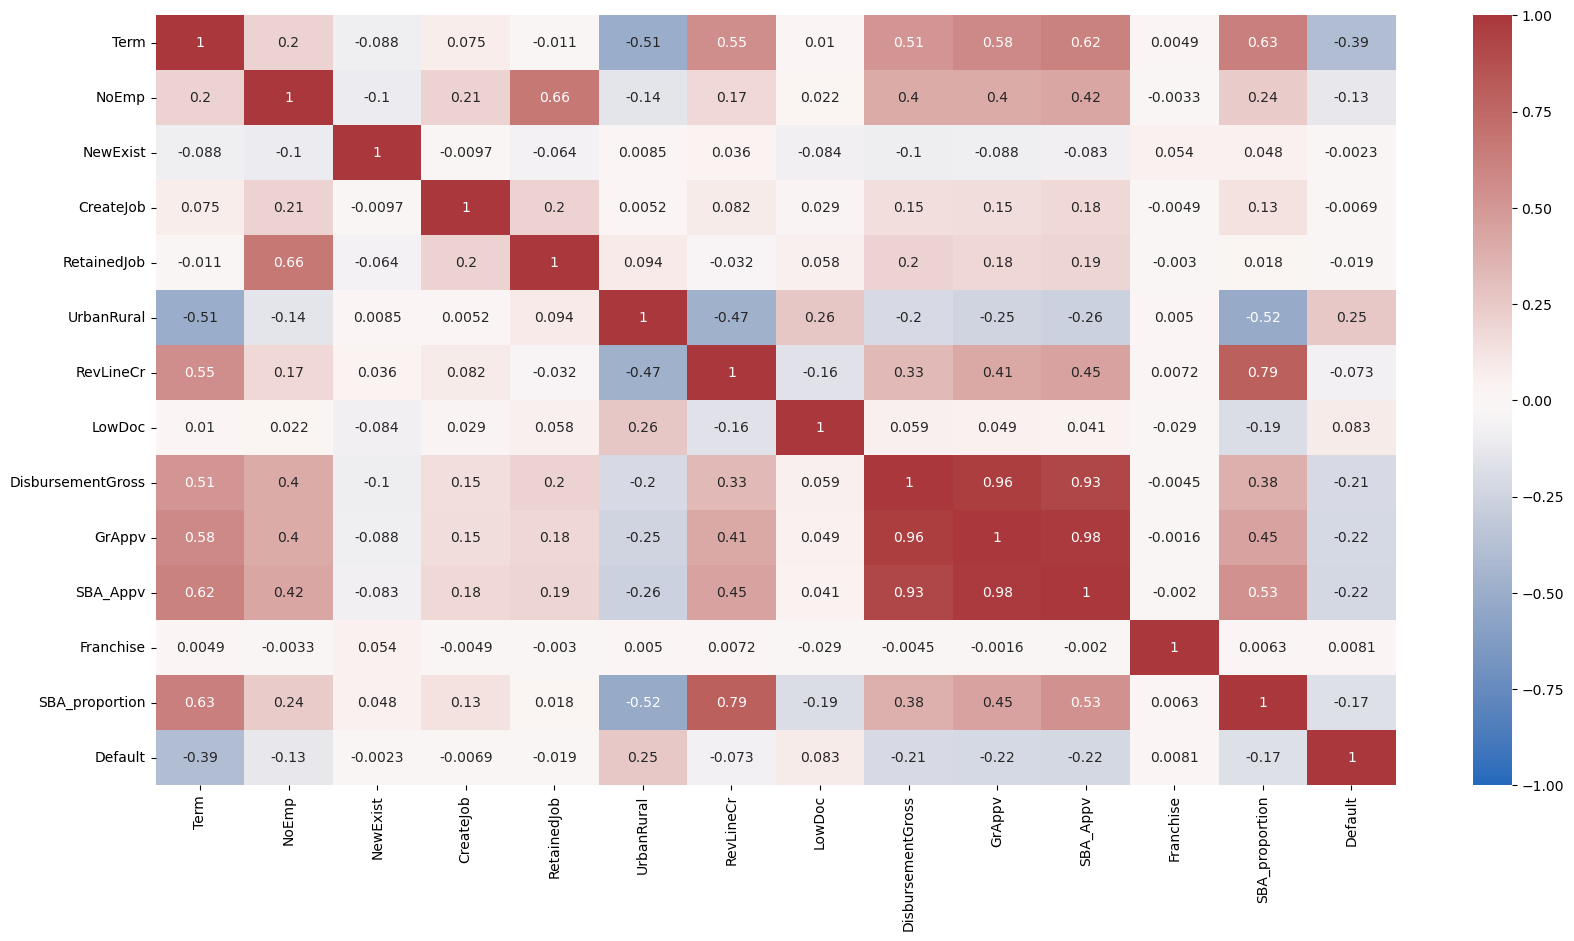

In [ ]:
# Check the correlation between all the features (pearson correlation)
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(data.corr(), cmap = 'vlag', annot=True, vmin = -1, vmax = 1);

In [ ]:
# Double check the pearson correlation
numeric_features = data.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['Default'].sort_values(ascending=False))

Default              1.000000
UrbanRural           0.250409
LowDoc               0.083386
Franchise            0.008134
NewExist            -0.002263
CreateJob           -0.006890
RetainedJob         -0.019447
RevLineCr           -0.073137
NoEmp               -0.127005
SBA_proportion      -0.173053
DisbursementGross   -0.206745
GrAppv              -0.216380
SBA_Appv            -0.221442
Term                -0.392605
Name: Default, dtype: float64


In [ ]:
# Double check the pearson correlation
print(np.corrcoef(numeric_features, rowvar=False))

[[ 1.          0.19552919 -0.08761026  0.07490363 -0.01089365 -0.50703995
   0.54999838  0.010045    0.51422164  0.57749335  0.6155824   0.00490722
   0.63206256 -0.39260456]
 [ 0.19552919  1.         -0.10314882  0.2066118   0.66443367 -0.14367937
   0.17220776  0.02238212  0.40307095  0.403325    0.42367359 -0.00327443
   0.23772952 -0.12700547]
 [-0.08761026 -0.10314882  1.         -0.00972123 -0.06444403  0.00846978
   0.03614863 -0.08356552 -0.10040691 -0.08844071 -0.08298048  0.05416733
   0.0482534  -0.00226286]
 [ 0.07490363  0.2066118  -0.00972123  1.          0.19895929  0.0052119
   0.08172002  0.02881449  0.14701874  0.15015865  0.17847741 -0.00490383
   0.12921104 -0.00689   ]
 [-0.01089365  0.66443367 -0.06444403  0.19895929  1.          0.09354551
  -0.03190066  0.05818604  0.20236179  0.18317582  0.19388585 -0.00299487
   0.01779595 -0.01944733]
 [-0.50703995 -0.14367937  0.00846978  0.0052119   0.09354551  1.
  -0.47335581  0.26045696 -0.20471515 -0.24935982 -0.2648626

In [ ]:
# Check spearman correlation
numeric_features.corr(method='spearman')

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,SBA_Appv,Franchise,SBA_proportion,Default
Term,1.000000,0.227886,-0.012739,-0.007508,-0.304650,-0.447880,0.496688,-0.049016,0.408699,0.462745,0.490978,0.010272,0.576229,-0.565439
NoEmp,0.227886,1.000000,-0.197978,0.156961,0.286901,-0.231548,0.245253,0.016540,0.546316,0.575810,0.564514,0.005986,0.280238,-0.178552
NewExist,-0.012739,-0.197978,1.000000,-0.033139,-0.086650,0.009875,0.036149,-0.083566,-0.185842,-0.179036,-0.153675,0.054167,0.052201,-0.002263
CreateJob,-0.007508,0.156961,-0.033139,1.000000,0.324211,0.133939,0.027046,0.108591,0.113944,0.107656,0.114050,-0.005601,0.129902,0.048470
RetainedJob,-0.304650,0.286901,-0.086650,0.324211,1.000000,0.447095,-0.346053,0.186280,-0.077143,-0.127618,-0.162411,-0.012945,-0.330430,0.166523
UrbanRural,-0.447880,-0.231548,0.009875,0.133939,0.447095,1.000000,-0.484053,0.268560,-0.329919,-0.417868,-0.459231,0.004327,-0.531039,0.256488
RevLineCr,0.496688,0.245253,0.036149,0.027046,-0.346053,-0.484053,1.000000,-0.163486,0.342029,0.481781,0.559433,0.007225,0.788983,-0.073137
LowDoc,-0.049016,0.016540,-0.083566,0.108591,0.186280,0.268560,-0.163486,1.000000,0.029029,-0.019751,-0.063402,-0.028919,-0.196811,0.083386
DisbursementGross,0.408699,0.546316,-0.185842,0.113944,-0.077143,-0.329919,0.342029,0.029029,1.000000,0.942049,0.915948,-0.006364,0.407968,-0.238428
GrAppv,0.462745,0.575810,-0.179036,0.107656,-0.127618,-0.417868,0.481781,-0.019751,0.942049,1.000000,0.989067,-0.000559,0.510672,-0.277556


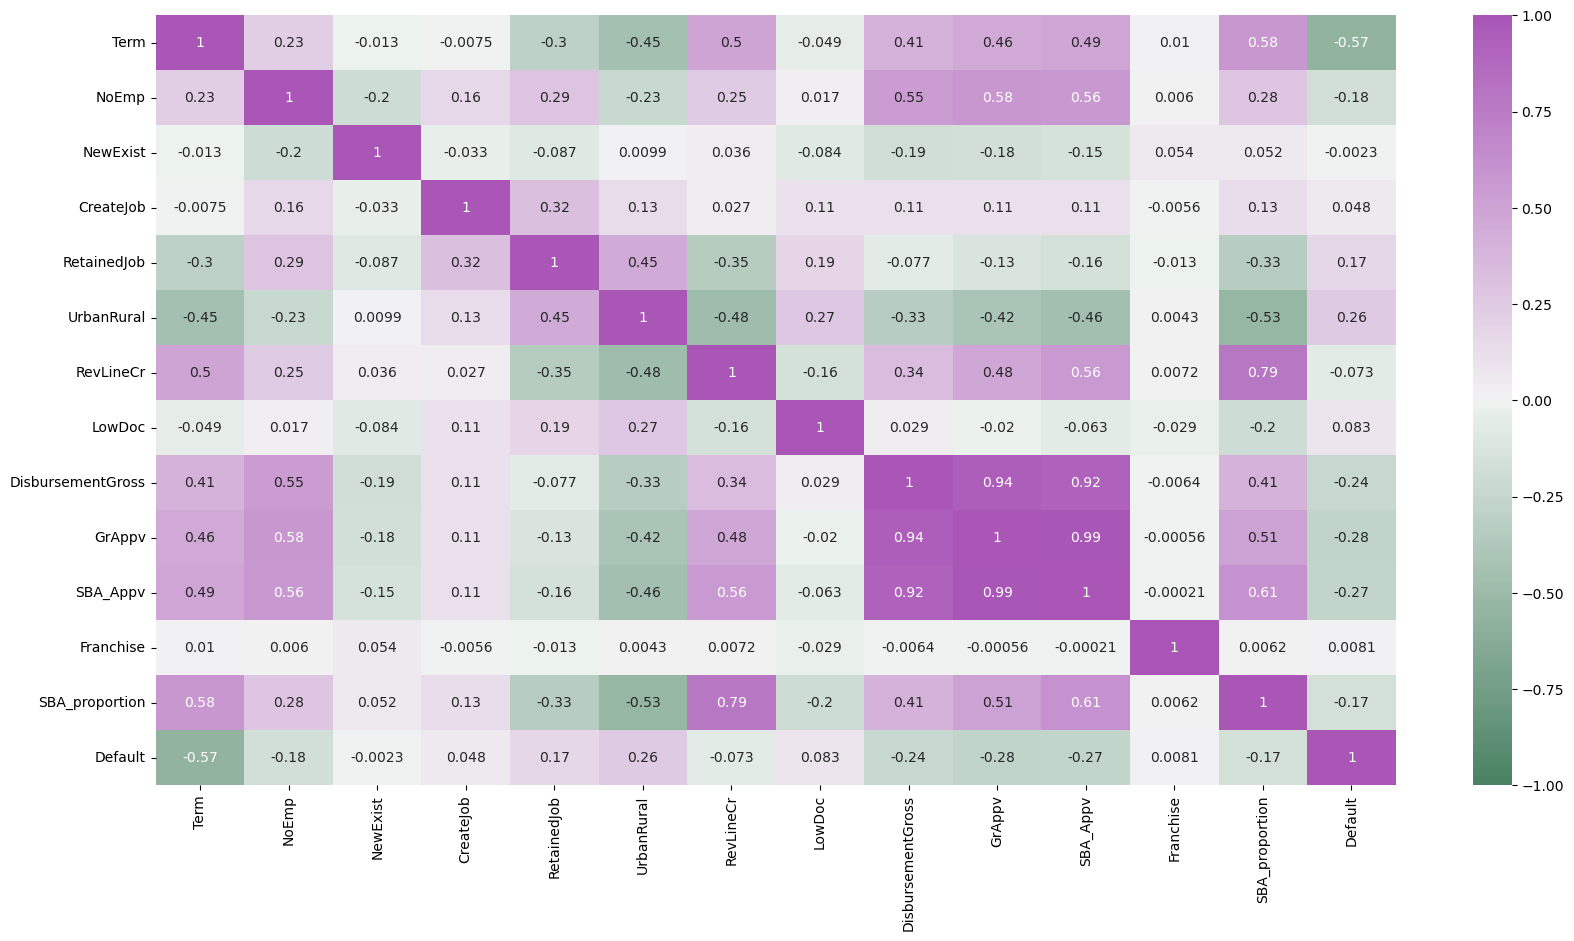

In [ ]:
spearman_corr = numeric_features.corr(method='spearman')

fig, ax = plt.subplots(figsize=(20, 10))
cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)
sns.heatmap(spearman_corr, cmap=cmap, annot=True, vmin = -1, vmax = 1)
plt.show()

There might be multicollinearity between 'DisbursementGross', 'GrAppv', and 'SBA_Appv' as those features are highly correlated.

Therefore, only 'DisbursementGross' will remain since it represents the total amount of the loan.

In [ ]:
# Create the final dataset
final_data = data[['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'UrbanRural', 'RevLineCr', 'LowDoc', 'DisbursementGross', 'Franchise', 'SBA_proportion', 'Default']].reset_index()
final_data = final_data.drop('index', axis=1)
final_data

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,Franchise,SBA_proportion,Default
0,60,7,1,3,10,1,0,1,85163,0,33.3,0
1,7,15,1,0,0,0,0,1,100591,0,33.3,0
2,84,5,1,0,0,0,1,1,50000,0,33.3,0
3,36,2,1,0,0,0,0,1,25000,0,33.3,0
4,4,8,1,0,0,0,0,1,99193,0,33.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7407,240,9,1,14,0,0,1,1,234000,0,50.0,0
7408,240,3,1,2,1,0,1,1,58000,0,50.0,0
7409,84,3,2,0,0,0,1,1,85000,0,44.4,0
7410,240,30,1,15,15,0,1,1,278000,0,50.0,0


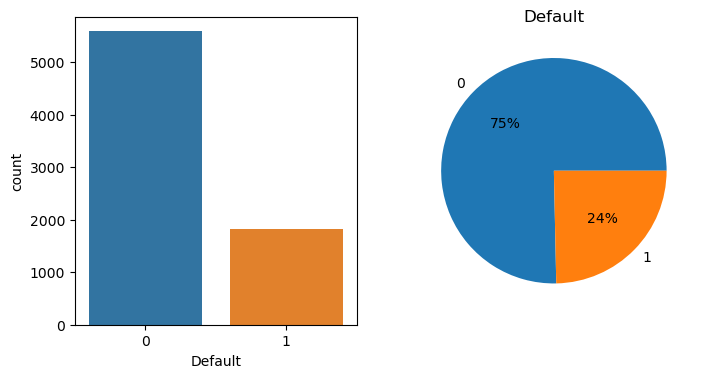

In [ ]:
# Show countplot and pie chart of 'Default'
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(data=final_data, x='Default', ax=ax[0]);
ax[1].pie(final_data['Default'].value_counts(),
             labels=final_data['Default'].value_counts().index,
             autopct='%d%%');
ax[1].set_title('Default');

In [ ]:
# Check the general statistics of each numerical feature
final_data.describe()

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,Franchise,SBA_proportion,Default
count,7412.000000,7412.000000,7412.000000,7412.000000,7412.000000,7412.000000,7412.000000,7412.000000,7.412000e+03,7412.000000,7412.000000,7412.000000
mean,106.419185,7.772396,1.147464,1.796006,4.529547,0.846465,0.455343,0.978144,1.671600e+05,0.002563,38.014234,0.246627
std,82.670615,15.218744,0.354591,9.317830,11.637340,0.485837,0.498035,0.146225,2.546757e+05,0.050569,6.320326,0.431077
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.260000e+03,0.000000,21.300000,0.000000
25%,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000e+04,0.000000,33.300000,0.000000
50%,84.000000,4.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,7.216000e+04,0.000000,33.300000,0.000000
75%,100.000000,8.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.890000e+05,0.000000,44.400000,0.000000
max,356.000000,342.000000,2.000000,451.000000,342.000000,2.000000,1.000000,1.000000,3.500000e+06,1.000000,50.000000,1.000000


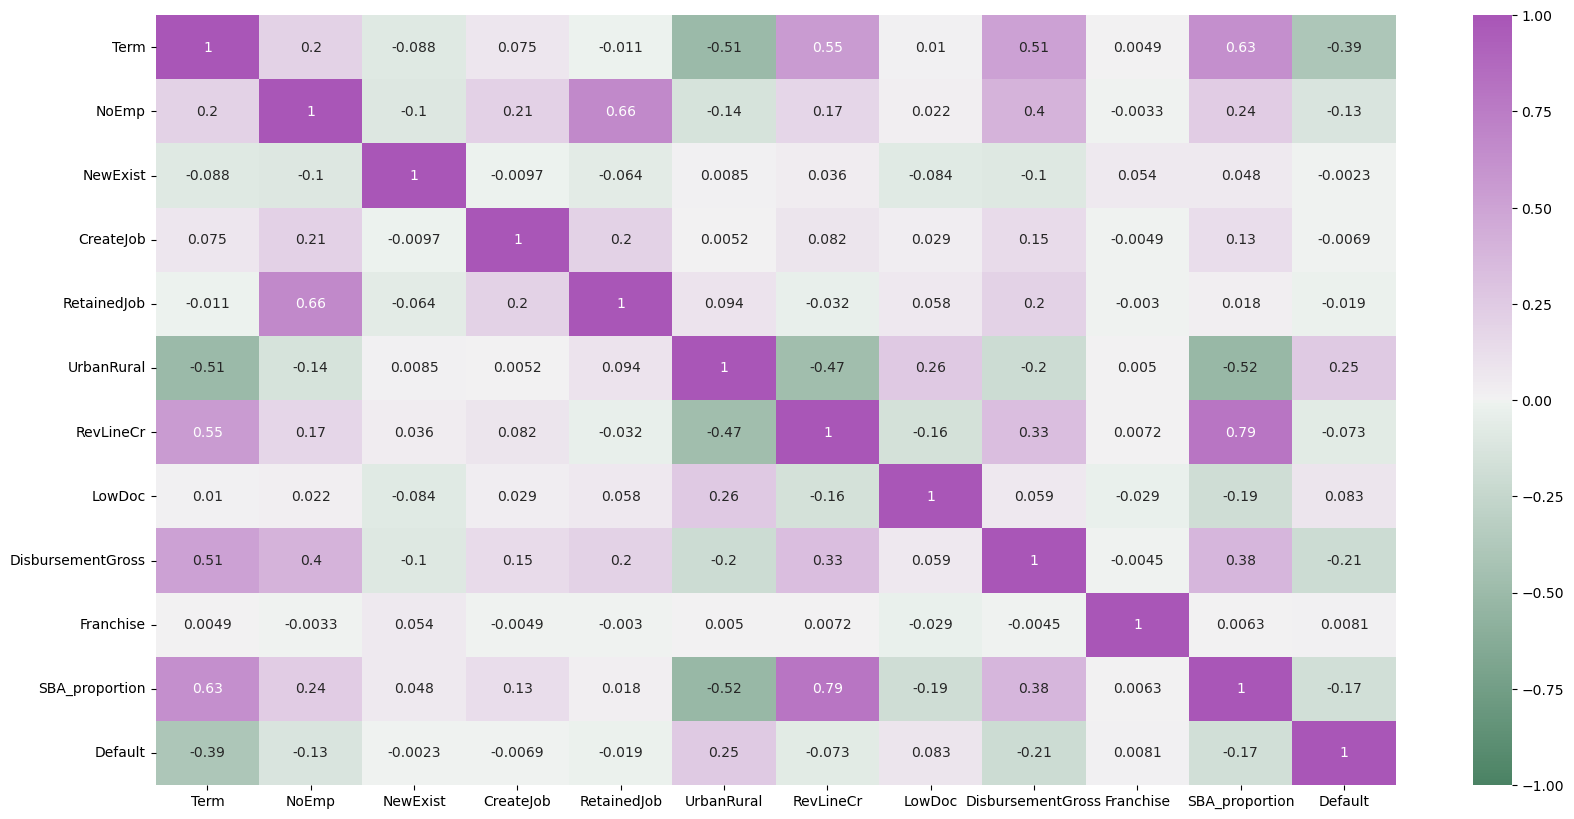

In [ ]:
# Check spearman correlation with heatmap
final_corr = final_data.corr(method='pearson')

fig, ax = plt.subplots(figsize=(20, 10))
cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)
sns.heatmap(final_corr, cmap=cmap, annot=True, vmin = -1, vmax = 1)
plt.show()

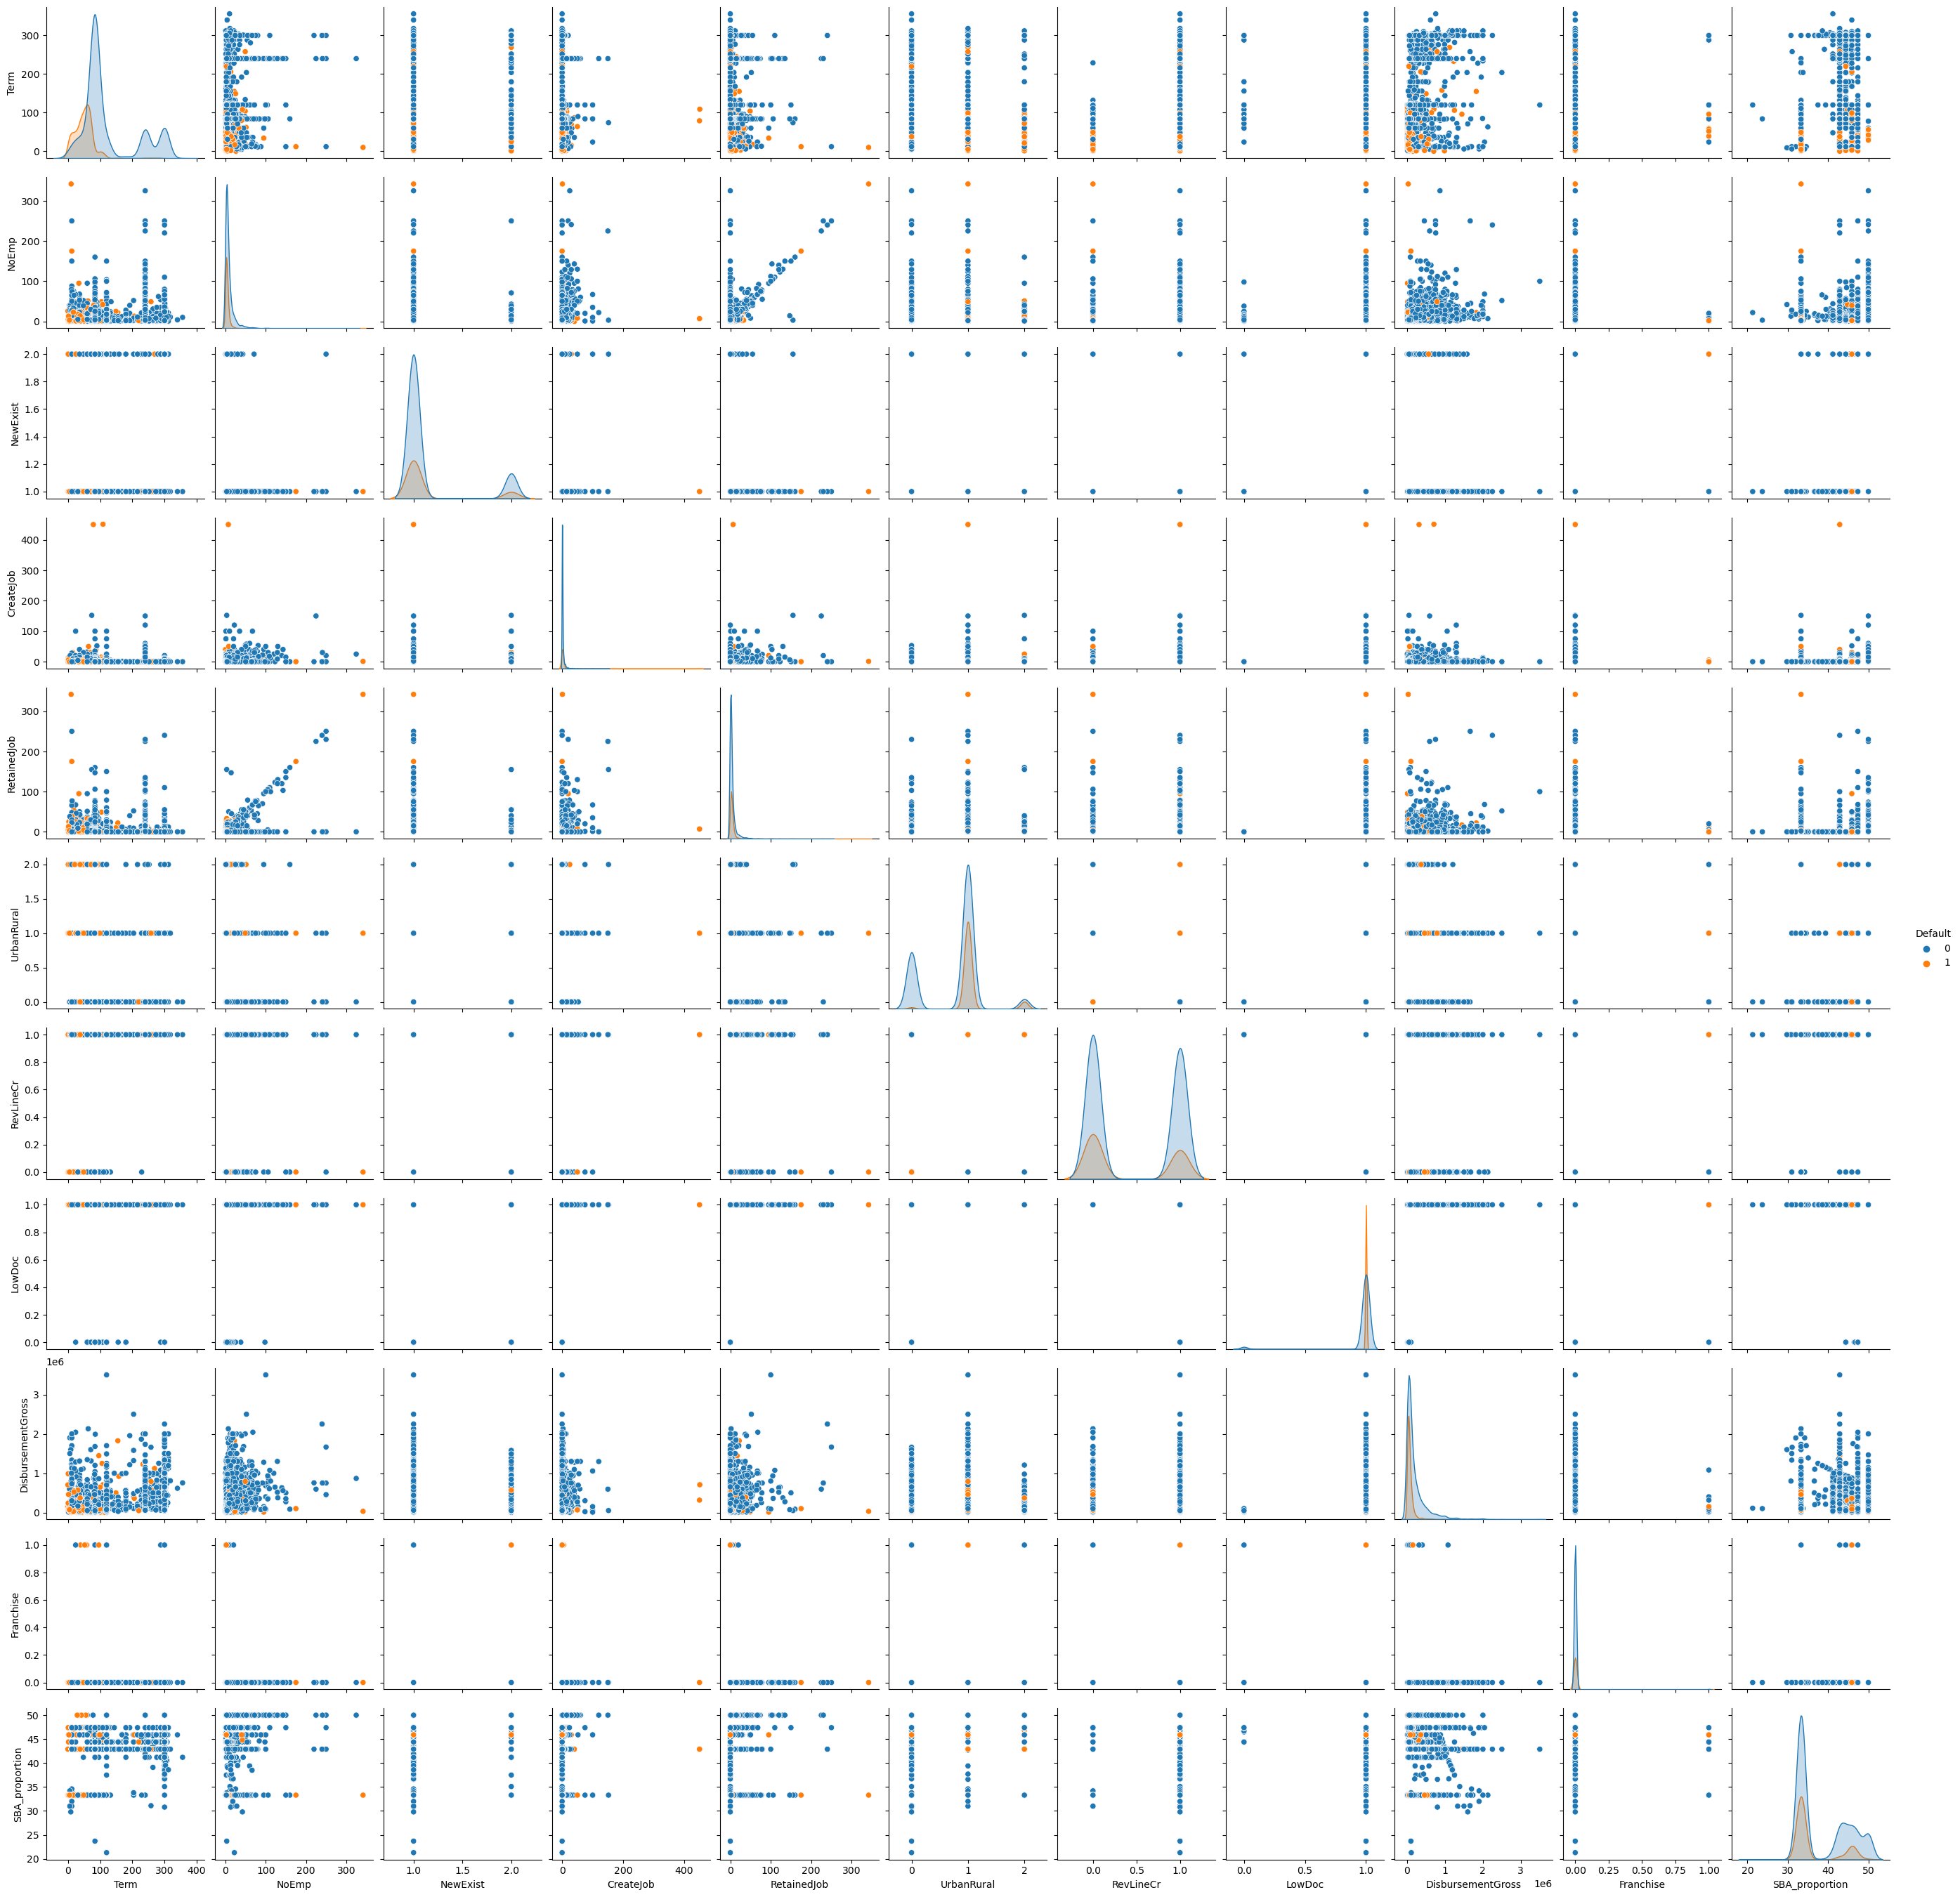

In [ ]:
# Check the combination of each column with pairplot indicating the target
sns.pairplot(final_data, hue='Default', diag_kind='kde')

In [ ]:
# Save the final data as dataset for modeling
#final_data.to_csv('data.csv')